![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Format EddyPro _fluxnet_ output files for upload to FLUXNET database
</b>
</span>

---
**Notebook version**: `3` (24 Oct 2023)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Background**

- Eddypro outputs `_fluxnet_` files
- The files cannot be directly uploaded to the FLUXNET database
- The class `FormatEddyProFluxnetFileForUpload` helps in formatting the files to comply with FLUXNET requirements for data sharing

More info:
- [FLUXNET Requirements for Data Sharing](https://www.swissfluxnet.ethz.ch/index.php/knowledge-base/fluxnet-requirements/)
- [Data submission - General Information](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/general-information)
- [FLUXNET Variables codes](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/variables-codes)

</br>

# **Imports**

In [1]:
import importlib.metadata
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from diive.pkgs.formats.fluxnet import FormatEddyProFluxnetFileForUpload  # Class to format output files for upload
from diive.core.plotting.heatmap_datetime import HeatmapDateTime  # For plotting heatmaps
from diive.core.plotting.timeseries import TimeSeries  # For simple (interactive) time series plotting

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

Loading BokehJS ...

diive version: v0.65.0


</br>

# **Docstring**

In [2]:
help(FormatEddyProFluxnetFileForUpload)

Help on class FormatEddyProFluxnetFileForUpload in module diive.pkgs.formats.fluxnet:

class FormatEddyProFluxnetFileForUpload(builtins.object)
 |  FormatEddyProFluxnetFileForUpload(site: str, sourcedir: str, outdir: str, add_runid: bool = True)
 |  
 |  Helper class to convert EddyPro _fluxnet_ output files to the file
 |  format required for data upload (data sharing) to FLUXNET
 |  
 |  The class does the following:
 |  - Search source folder for _fluxnet_ files
 |  - Load data from all found files and store in dataframe
 |  - Make subset that contains required variables
 |  - Set missing values to FLUXNET format (-9999)
 |  - Rename variables by adding the FLUXNET suffix (_1_1_1)
 |  - Insert two timestamp columns denoting START and END of averaging interval
 |  - Format the two timestamp columns to FLUXNET format YYYYMMDDhhmm
 |  - Save data from dataframe to yearly files
 |  
 |  - Example notebook available in:
 |      notebooks/Formats/ConvertEddyProFluxnetFileForUpload.ipynb
 

</br>

# **Input and output folders**

In [3]:
SOURCE = r"L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files"  # This is the folder where datafiles are searched
OUTDIR = r"L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload"  # Output yearly CSV to this folder

</br>

# **Format data**

## Initialize

In [4]:
fxn = FormatEddyProFluxnetFileForUpload(
    site='CH-FRU',
    sourcedir=SOURCE,
    outdir=OUTDIR,    
    add_runid=True)


Initiated formatting for datafiles with the following settings:
    site: CH-FRU
    source folder: L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files
    output folder: L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload
    add run ID: True


## Search and merge `_fluxnet_` datafiles

In [5]:
fxn.mergefiles(limit_n_files=None)


Searching for EDDYPRO_FLUXNET_30MIN files with extension .csv andID _fluxnet_ in folder L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files ...
    Found 18 files:
   --> L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files\2005_eddypro_CH-FRU_FR-20230430-150230_fluxnet_2023-04-30T205349_adv.csv
   --> L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files\2006_eddypro_CH-FRU_FR-20230429-014233_fluxnet_2023-04-29T152920_adv.csv
   --> L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files\2007_eddypro_CH-FRU_FR-20230429-013855_fluxnet_2023-04-29T140625_adv.csv
   --> L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files\2008_eddypro_CH-FRU_FR-20230429-013552_fluxnet_2023-04-29T154708_adv.csv
   --> L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\0-eddypro_fluxnet_files\2009_eddypro_CH-FRU_FR-20230428-010024_fluxnet_2023-04-28T143645_adv.csv
   --> L:\Sync\luhk

## Merged dataset

In [6]:
fxn.merged_df

AIR_MV  AIR_DENSITY  AIR_RHO_CP   AIR_CP  AOA_METHOD  AXES_ROTATION_METHOD     BOWEN  BURBA_METHOD  BADM_LOCATION_LAT  BADM_LOCATION_LONG  BADM_LOCATION_ELEV  BADM_HEIGHTC  BADM_INST_SAMPLING_INT  BADM_INST_AVERAGING_INT  BADM_INST_MODEL_SA  ...  W_T_SONIC_COV_IBROM_N0004  W_NUM_SPIKES  WD_FILTER_NREX  W_SPIKE_NREX  W_ABSLIM_NREX  W_VM97_TEST  W_LGD     W_KID    W_ZCD  W_ITC  W_ITC_TEST  WBOOST_APPLIED  WPL_APPLIED          ZL   ZL_UNCORR
TIMESTAMP_MIDDLE                                                                                                                                                                                                                                                         ...                                                                                                                                                                                                     
2005-07-05 08:45:00  0.026419      1.09553     1109.30  1012.57         0.0                   1.0   3.18180           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                   0.000632           0.0             0.0           0.0            0.0  801000011.0    0.0  10.67790  29714.0   74.0         4.0             0.0          1.0 -398.107000 -467.712000
2005-07-05 09:15:00  0.026355      1.09823     1111.84  1012.39         0.0                   1.0   2.73786           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                   0.000022           0.0             0.0           0.0            0.0  801000011.0    0.0   7.07312  26444.0   53.0         4.0             0.0          1.0  -19.829600  -23.150400
2005-07-05 09:45:00  0.026315      1.09993     1113.37  1012.22         0.0                   1.0 -12.16420           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                   0.000971           0.0             0.0           0.0            0.0  801000011.0    0.0   6.84782  25600.0   74.0         4.0             0.0          1.0 -158.833000 -182.128000
2005-07-05 10:15:00  0.026312      1.10003     1113.35  1012.11         0.0                   1.0  -1.27418           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                   0.000036           0.0             0.0           0.0            0.0  801000011.0    0.0   5.47279  22879.0   39.0         3.0             0.0          1.0   -5.895470   -6.398840
2005-07-05 10:45:00  0.026382      1.09714     1110.40  1012.09         0.0                   1.0   2.36833           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                   0.000141           0.0             0.0           0.0            0.0  801000011.0    0.0   8.05622  26767.0   15.0         1.0             0.0          1.0    8.726640    8.590340
...                       ...          ...         ...      ...         ...                   ...       ...           ...                ...                 ...                 ...           ...                     ...                      ...                 ...  ...                        ...           ...             ...           ...            ...          ...    ...       ...      ...    ...         ...             ...          ...         ...         ...
2022-12-31 22:45:00  0.025906      1.11442     1125.59  1010.02         0.0                   1.0  -3.64549           0.0            47.1158             8.53778               982.0           0.4                    20.0                     30.0                 NaN  ...                  -0.000189

## Test for signal strength / AGC

<div class="alert alert-block alert-danger">
    <b>Do not use for H (sensible heat flux).</b> This test is only relevant for fluxes where the concentration was measured by a gas analyzer, e.g. FC, FH2O, LE, ET, N2O, CH4, etc ... 
</div>

In [7]:
FLUXCOLS = ['FC', 'LE']  # Give flux columns as list
SIGNAL_STRENGTH_COL = 'CUSTOM_AGC_MEAN'  # Name of the column storing the signal strength, typically 'CUSTOM_AGC_MEAN' for LI-7500, 'CUSTOM_SIGNAL_STRENGTH_IRGA72_MEAN' for LI-7200, or something similar
SIGNAL_STRENGTH_THRESHOLD = 90  # Signal strength threshold, flux values where threshold is exceeded are flagged as rejected
SIGNAL_STRENGTH_METHOD = 'discard above'  # 'discard above' flags fluxes where signal strength > threshold, 'discard below' where signal strength < threshold

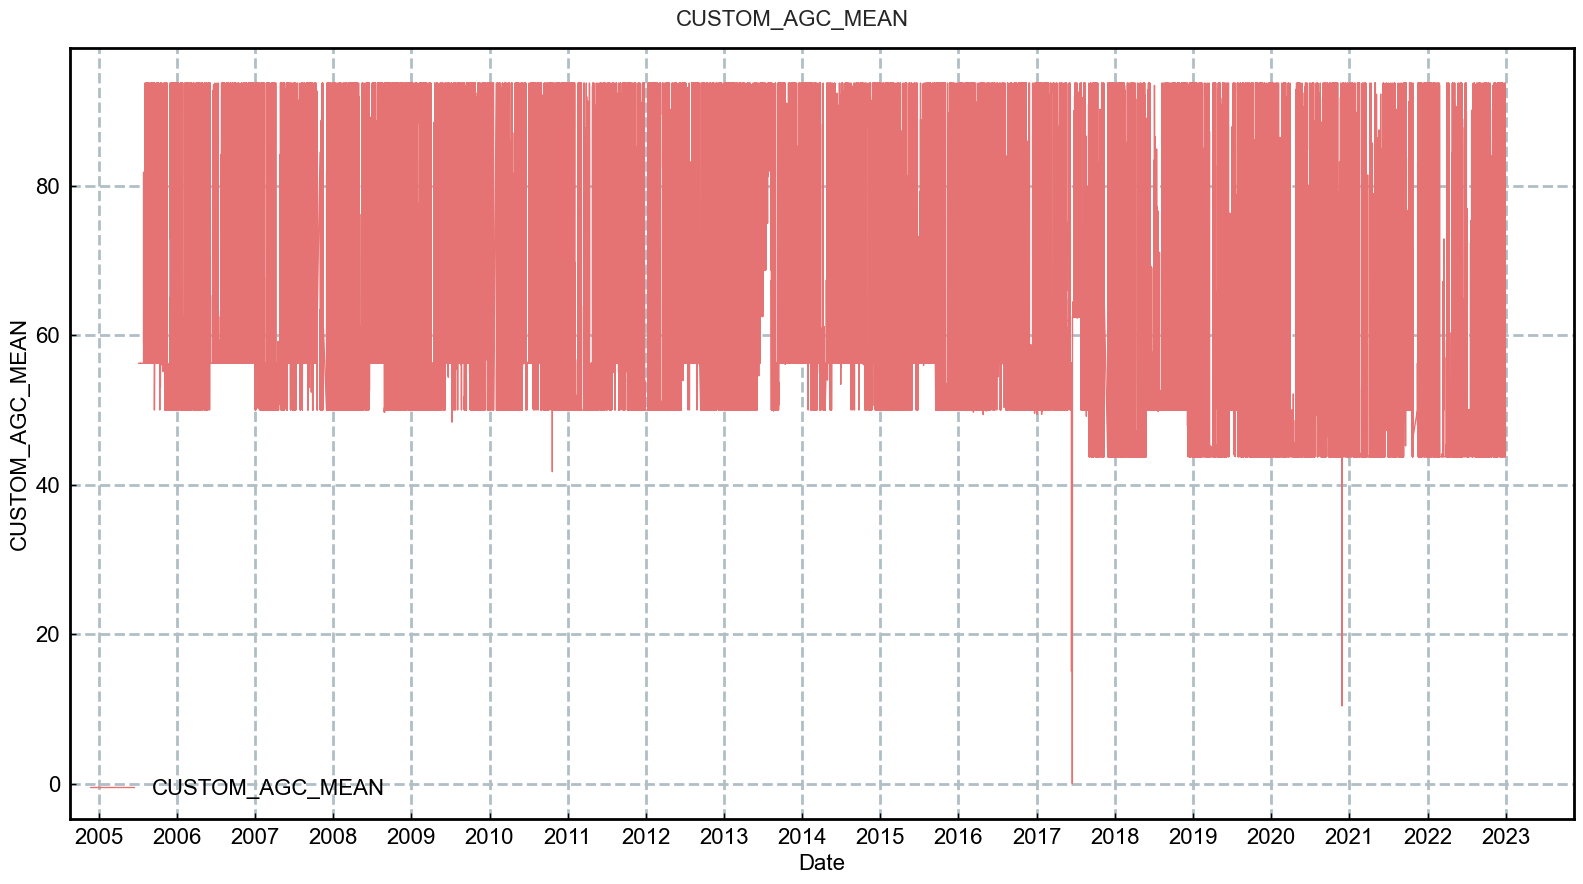

In [8]:
# TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot_interactive()
TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot()



Removing FC flux values where signal strength / AGC is not sufficient:

Performing quality checks ...

Detected base variable CO2 for FC.
Generating new flag variable FLAG_L2_FC_MISSING_TEST, newly calculated from output variable FC,with flag 0 (good values) where FC is available, flag 2 (bad values) where FC is missing ...
Generating new flag variable FLAG_L2_FC_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 (good values) where CUSTOM_AGC_MEAN <= 90, flag 2 (bad values) where CUSTOM_AGC_MEAN > 90 ...
++Adding new column FLAG_L2_FC_MISSING_TEST (Level-2 quality flag) to main data ...
++Adding new column FLAG_L2_FC_SIGNAL_STRENGTH_TEST (Level-2 quality flag) to main data ...

Generating overall quality flag QCF ...


QCF FLAG EVOLUTION
This output shows the evolution of the QCF overall quality flag
when test flags are applied sequentially to the variable FC.

Number of FC records before QC: 274928
+++ FLAG_L2_FC_MISSING_TEST rejected 0 values 

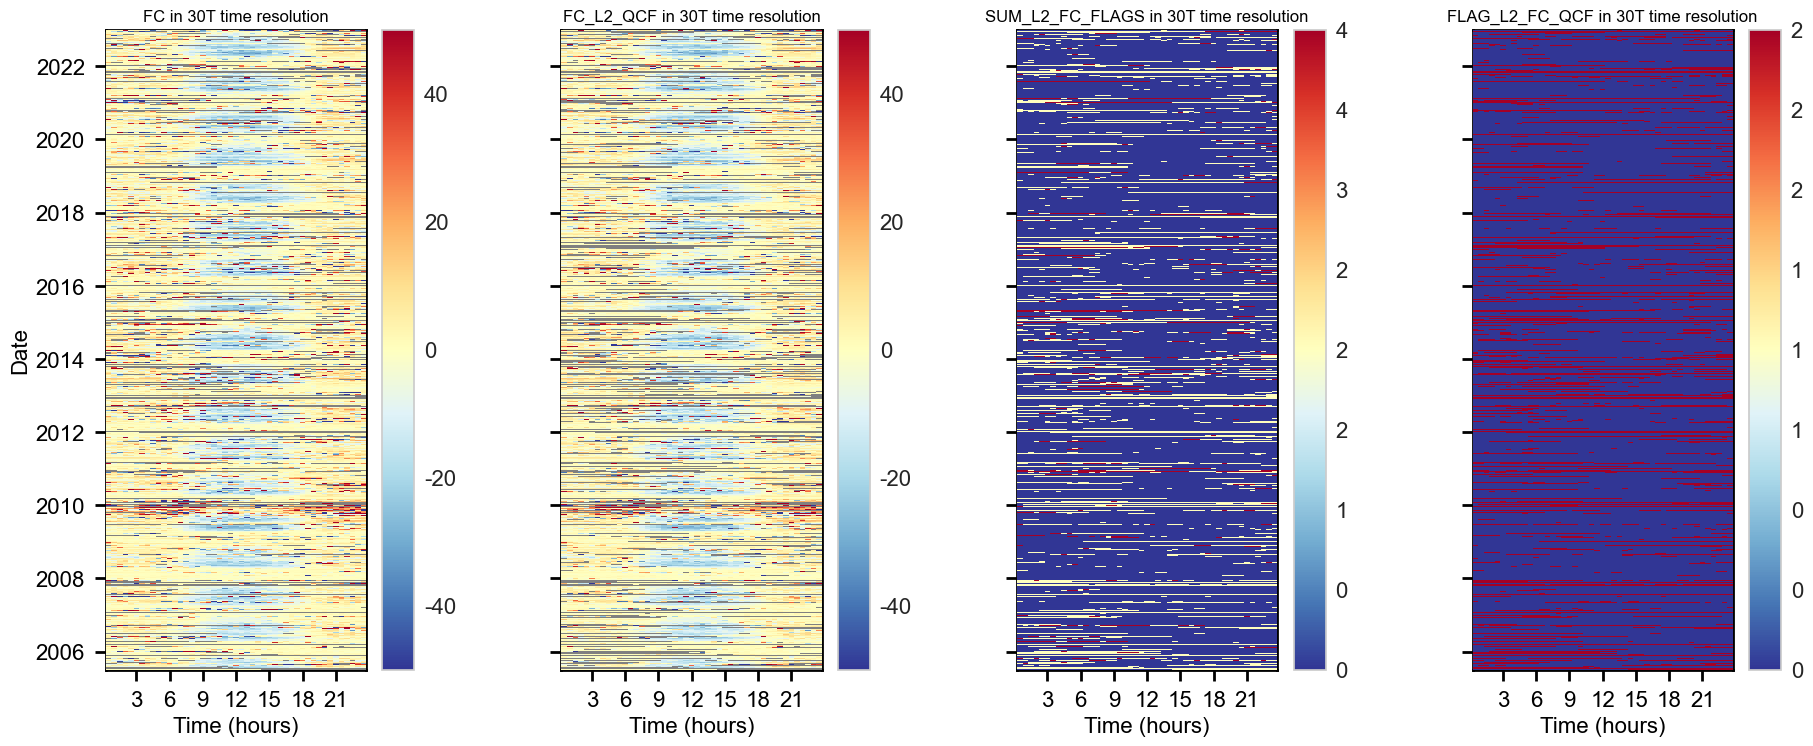

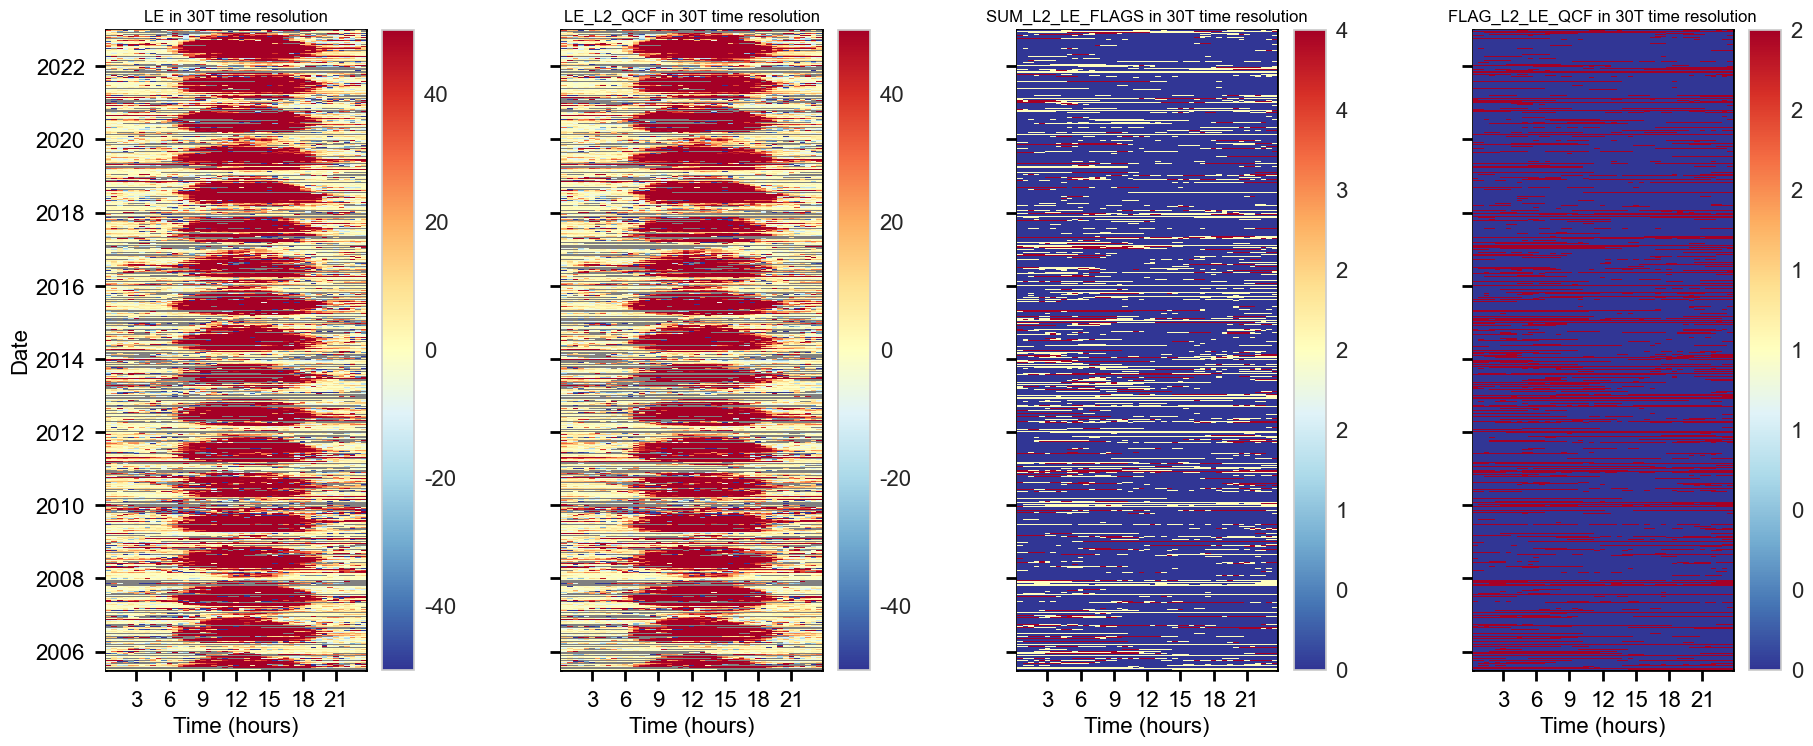

In [9]:
for f in FLUXCOLS:
    fxn.remove_low_signal_data(fluxcol=f,
                               signal_strength_col=SIGNAL_STRENGTH_COL,
                               method=SIGNAL_STRENGTH_METHOD,
                               threshold=SIGNAL_STRENGTH_THRESHOLD)

## Remove problematic time periods
               
Use `REMOVE_DATES` to specify the time period(s) for `VAR` that are removed from the dataset.

For example:

```python
REMOVE_DATES = ['2022-06-30 23:58:30',
                ['2022-06-05 00:00:30', '2022-06-07 14:30:00']]
```
will remove the record for `2022-06-30 23:58:30` and all records between
`2022-06-05 00:00:30` (inclusive) and `2022-06-07 14:30:00` (inclusive).

This also works when providing only the date, e.g.
```python
REMOVE_DATES = [['2006-05-01', '2006-07-18']] 
```
will remove all data points between `2006-05-01` (inclusive) and `2006-07-18` (inclusive).

### Plot affected variables

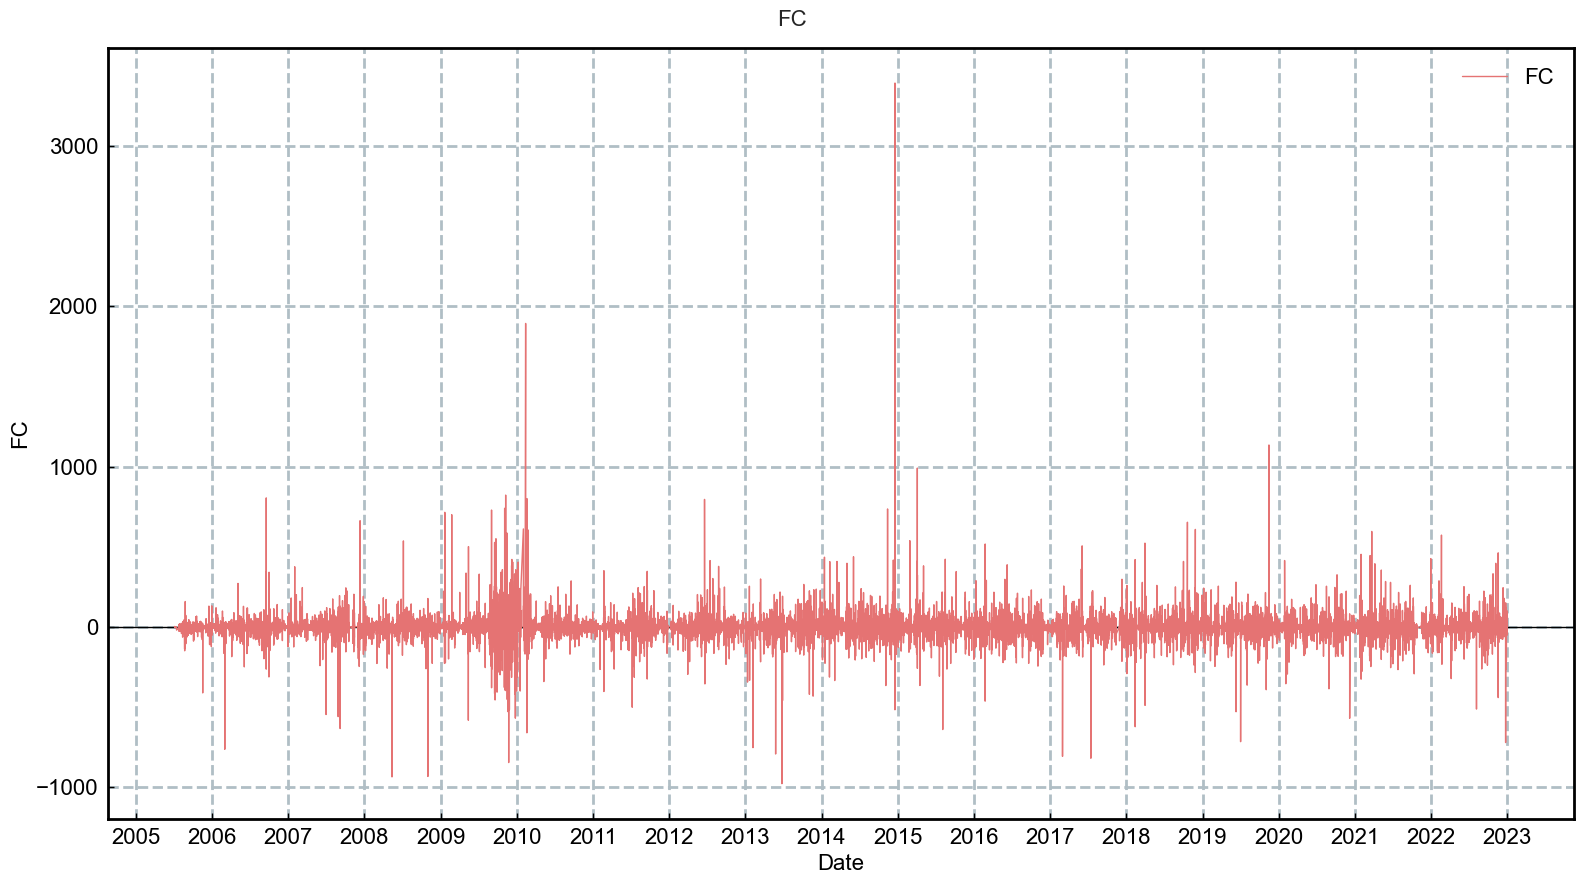

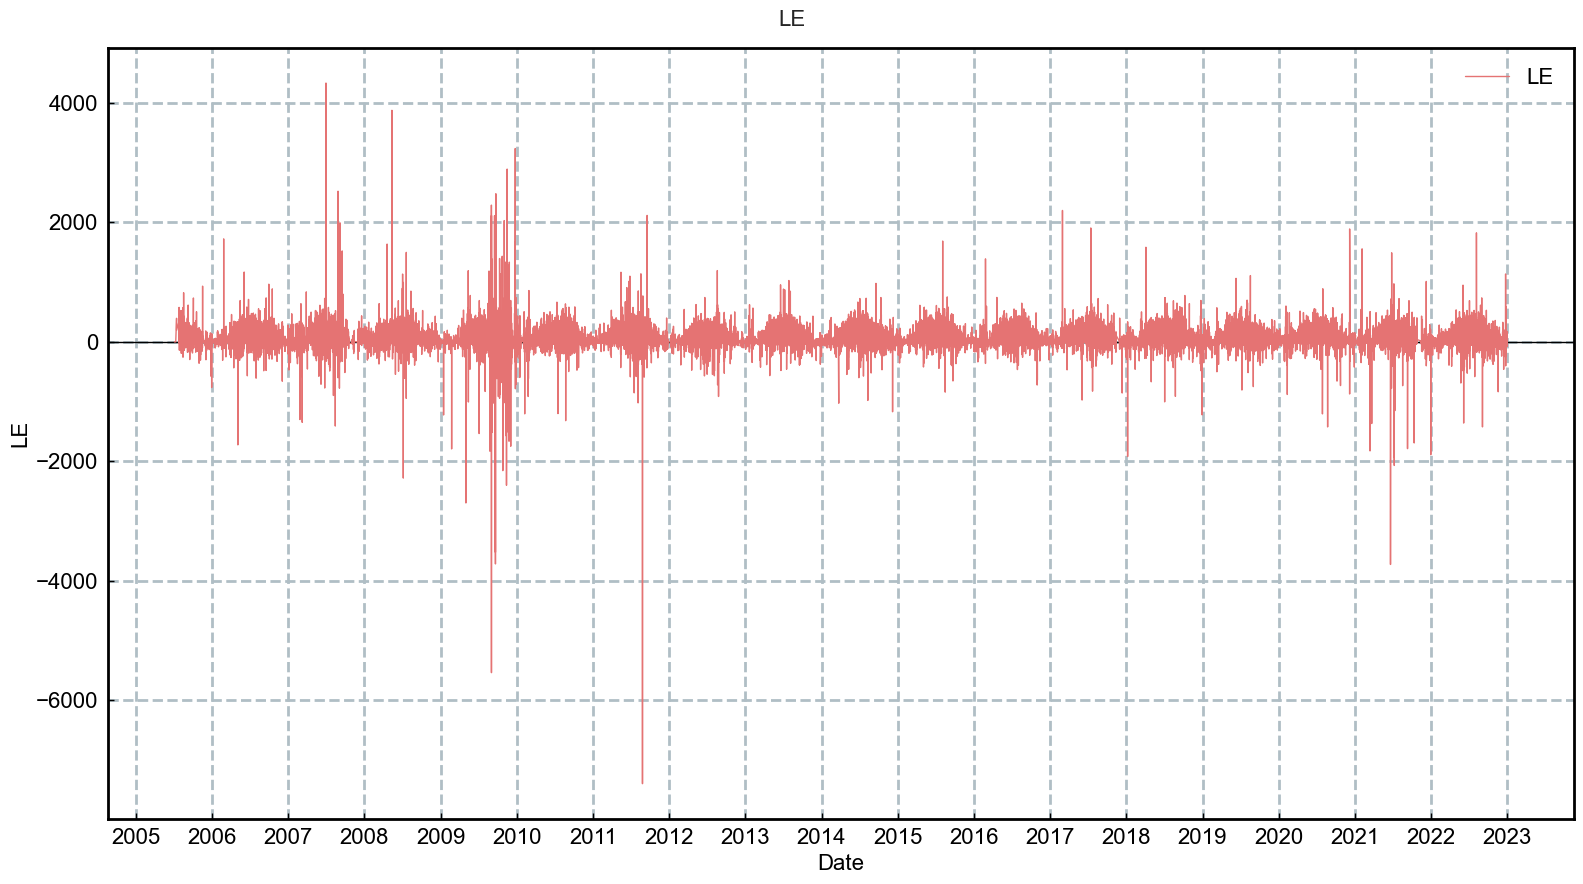

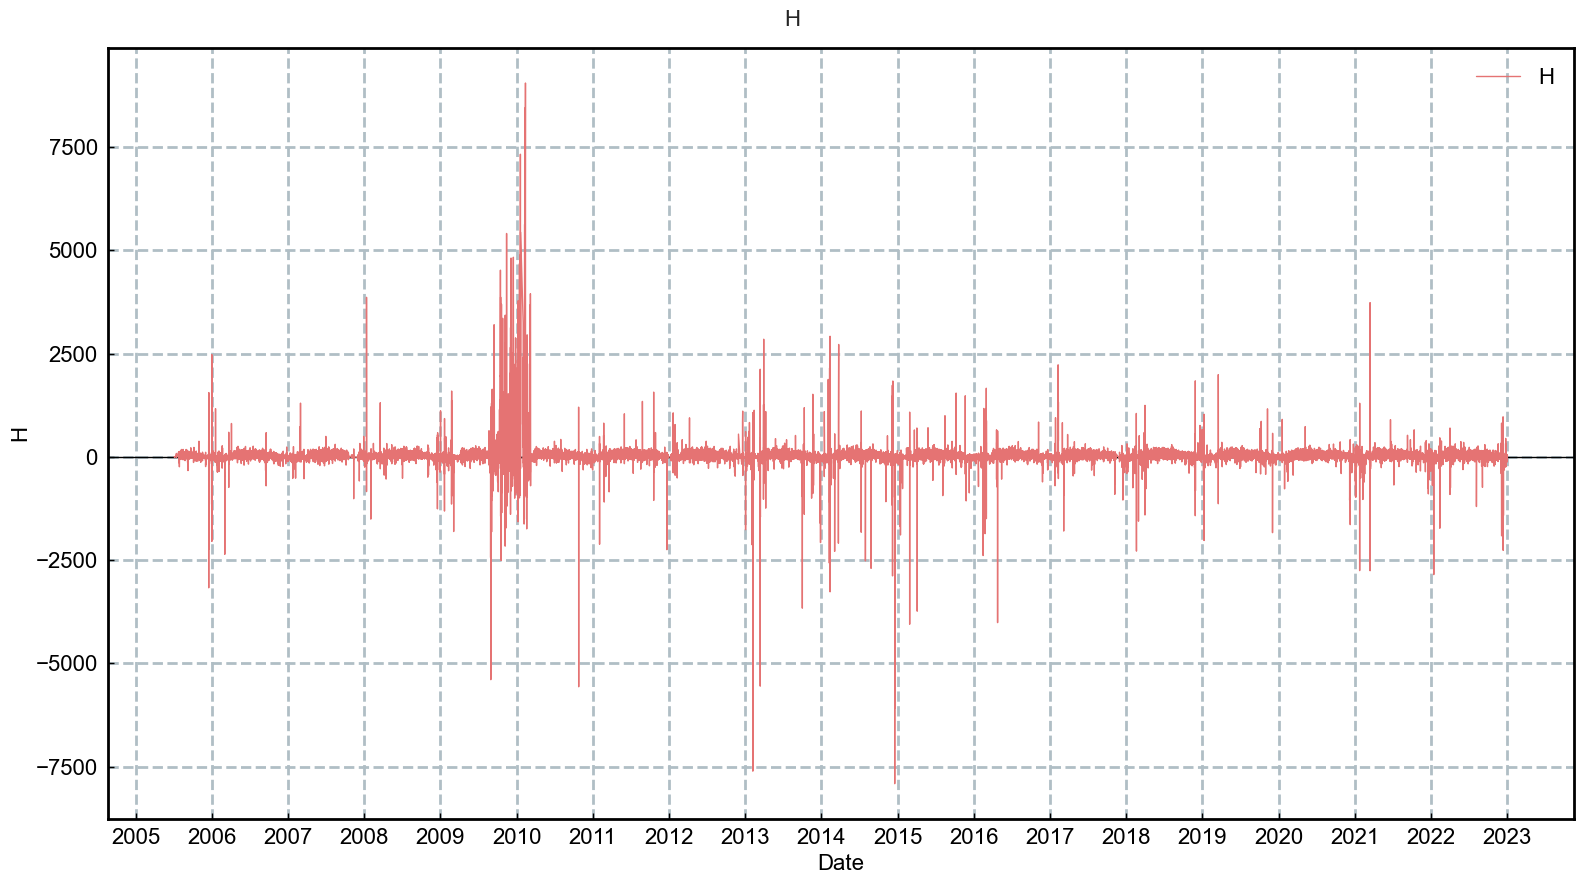

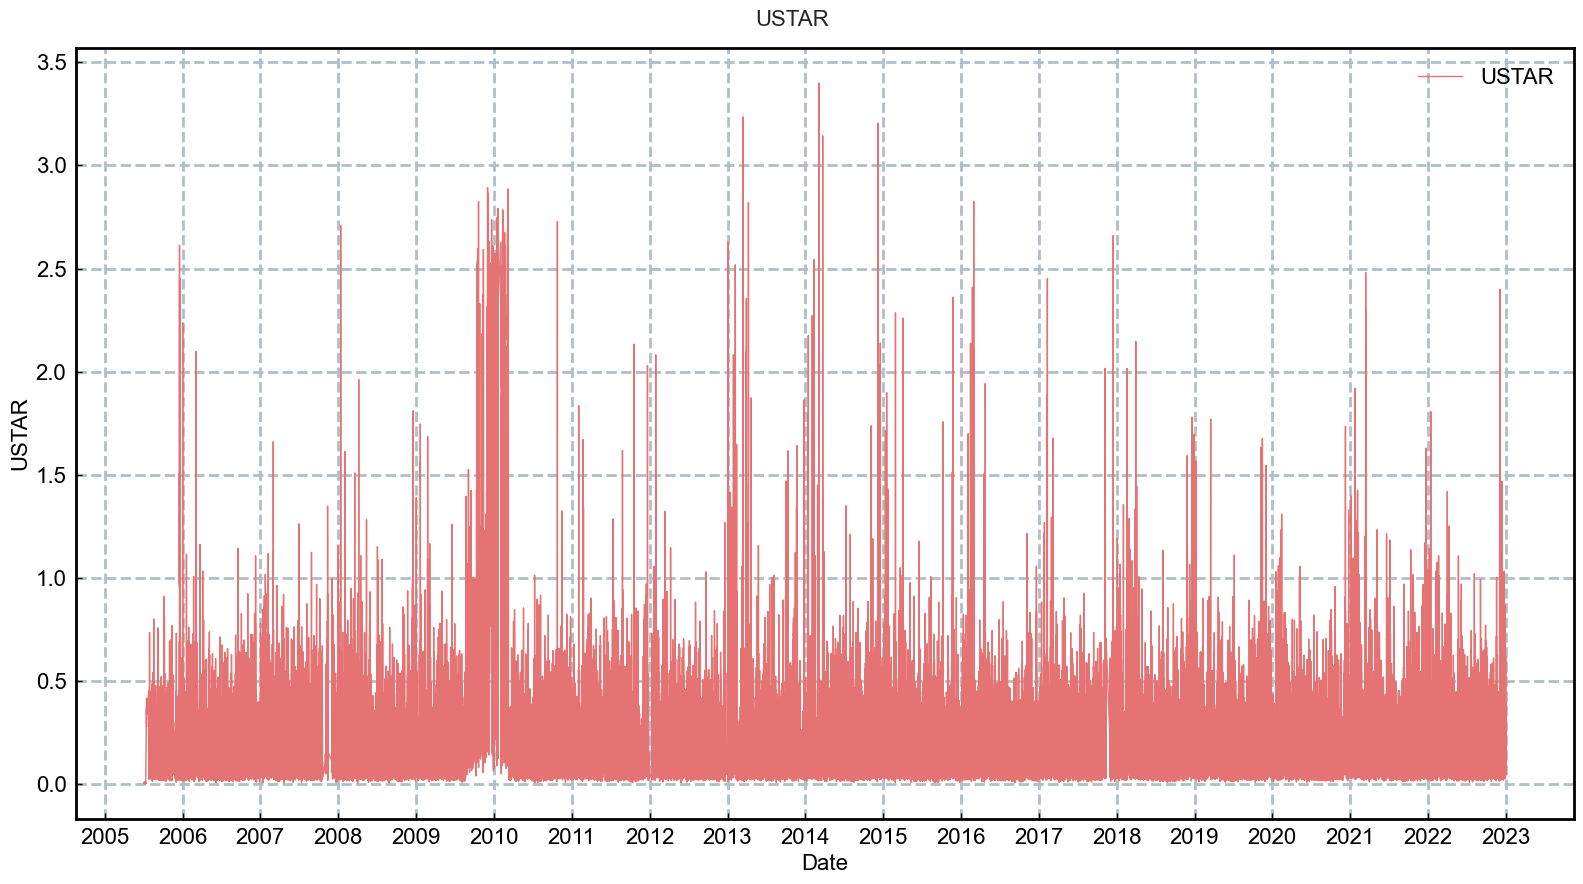

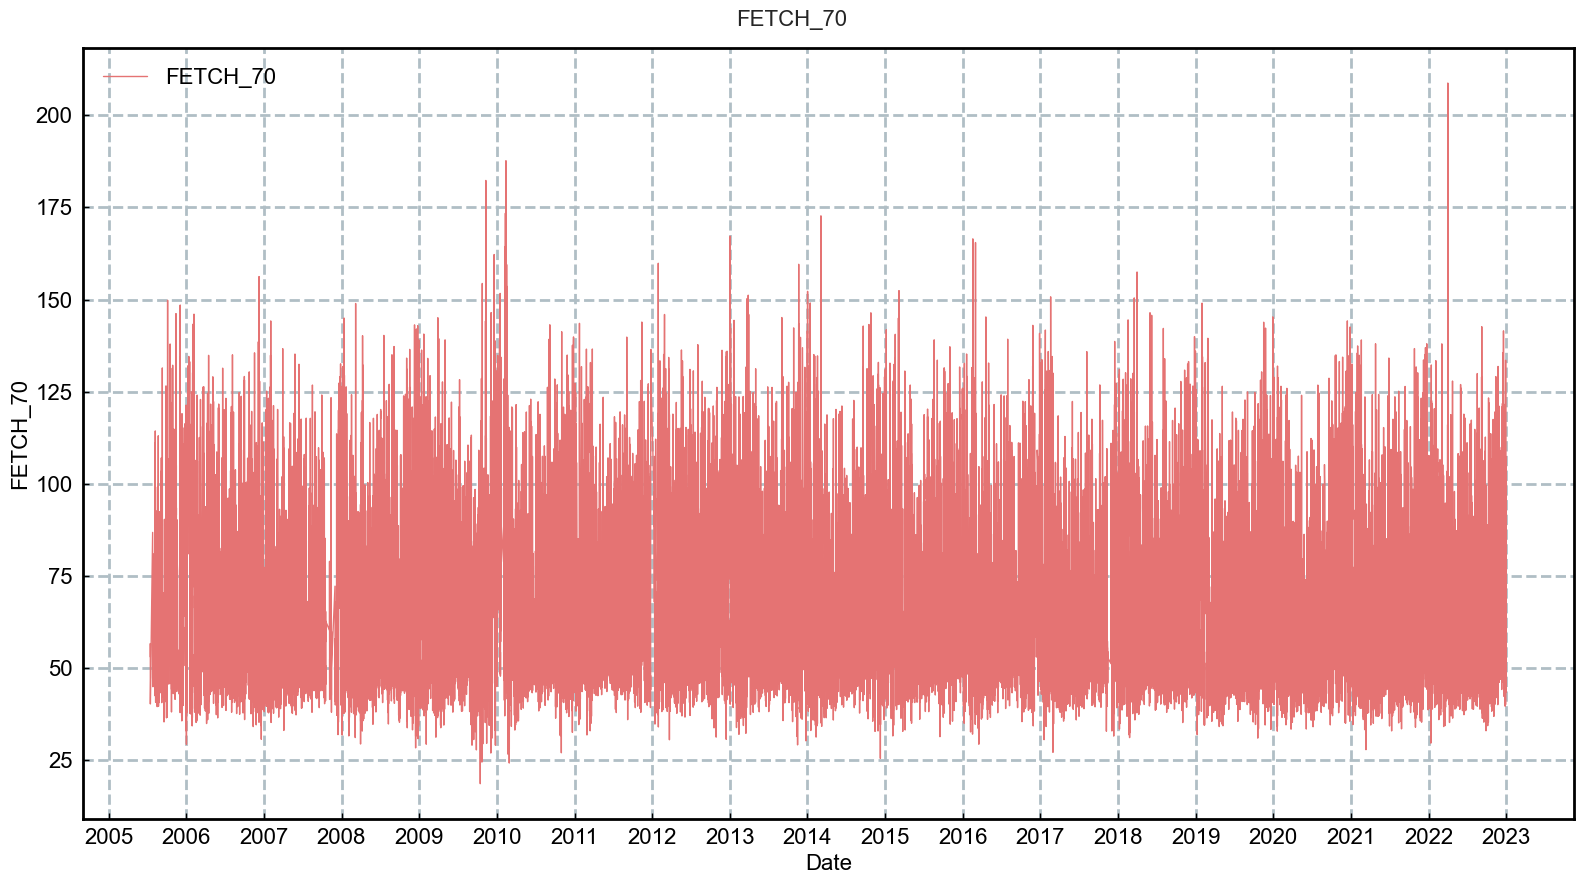

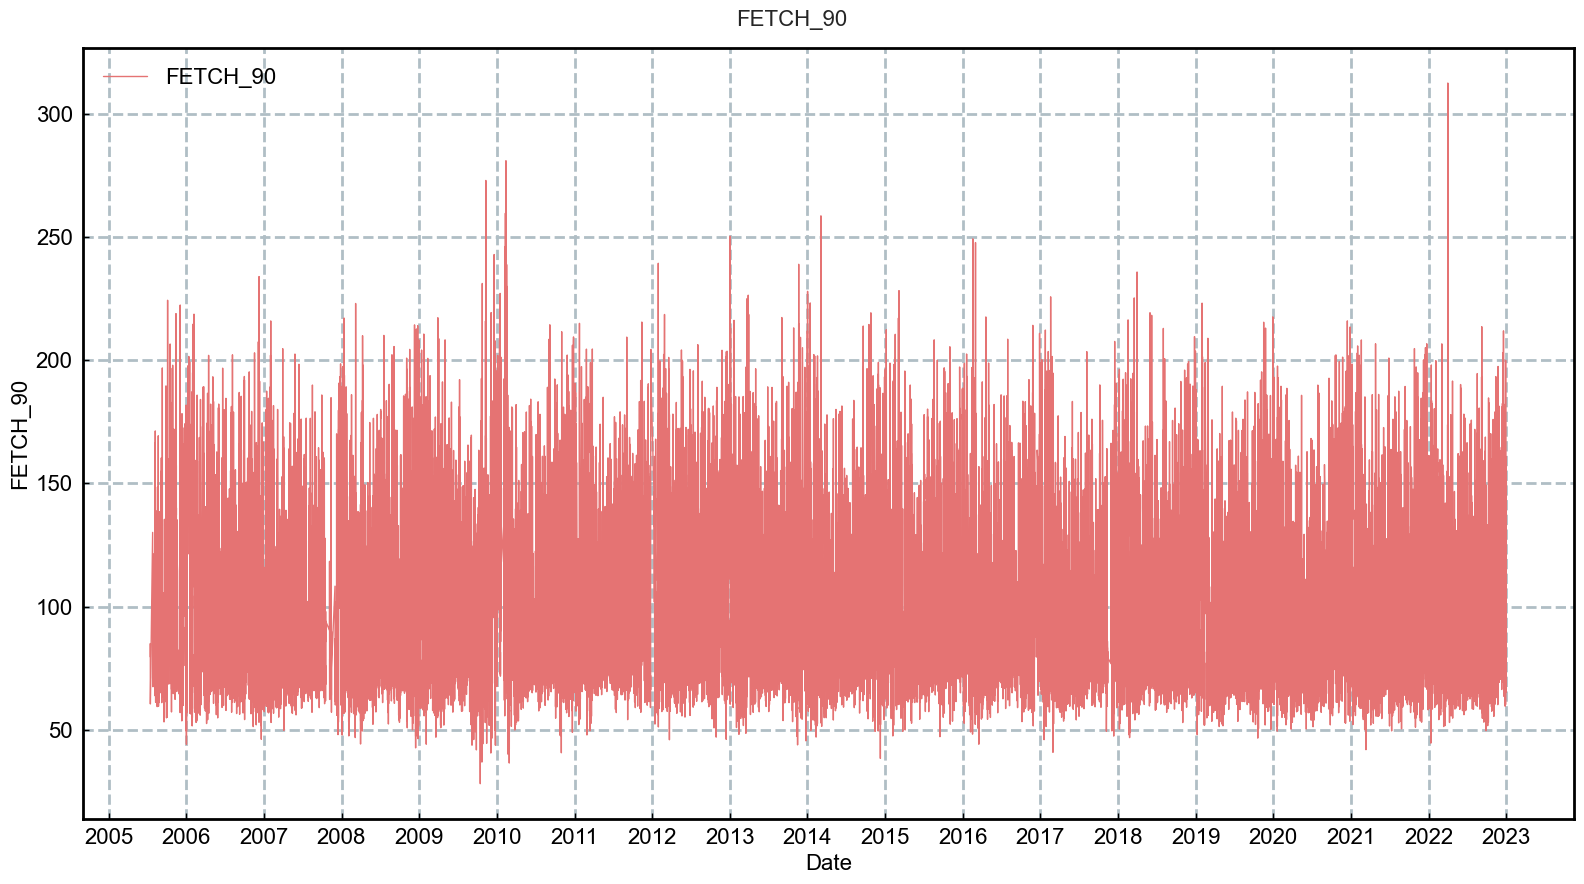

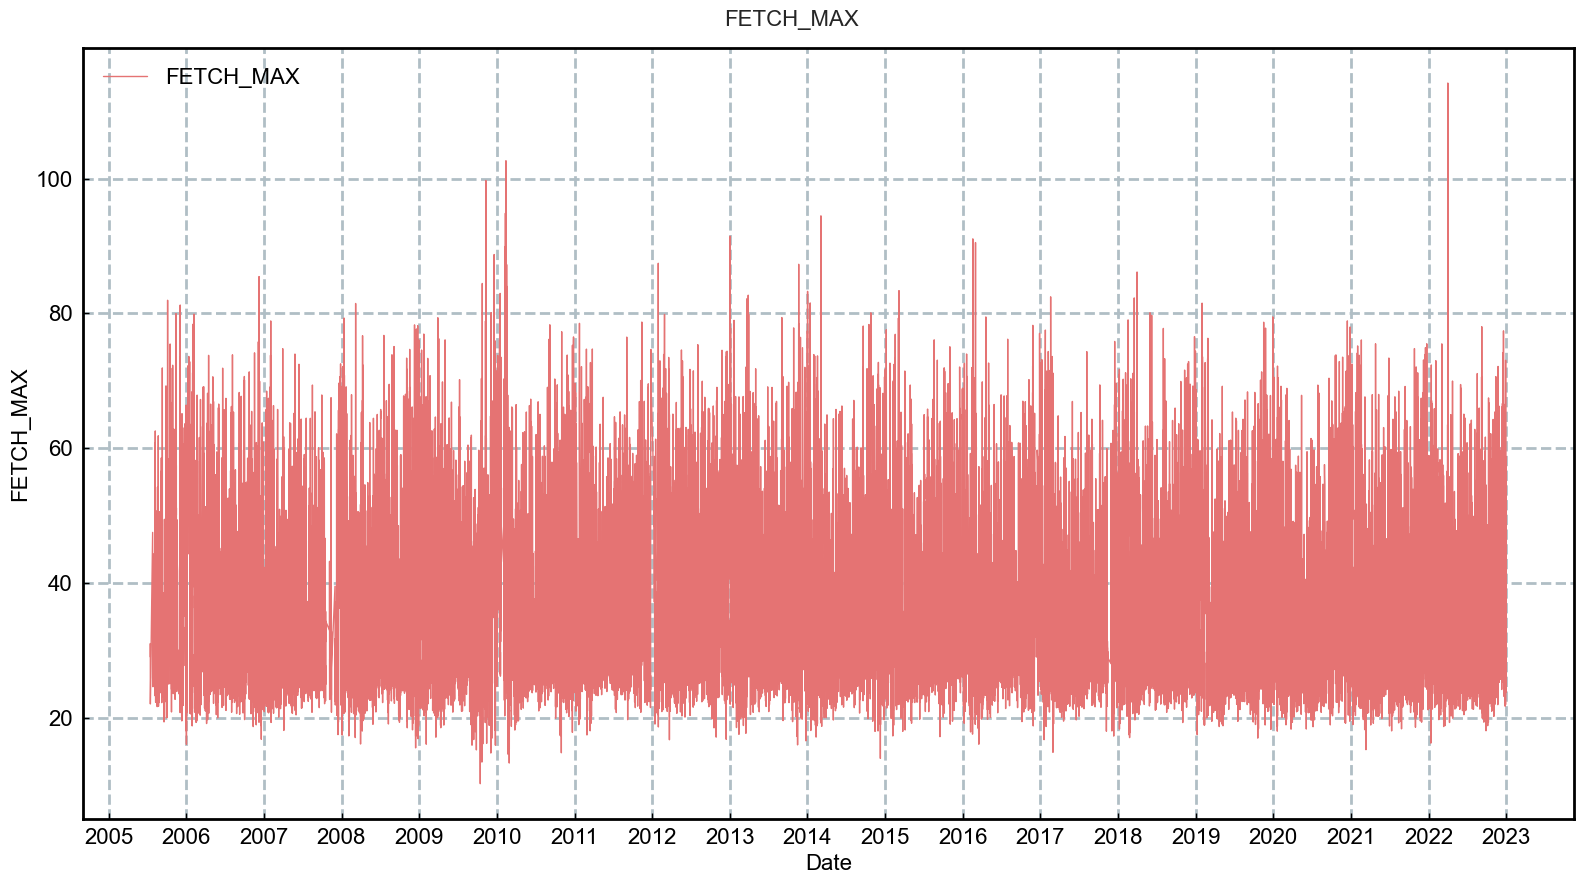

In [10]:
VAR = ['FC', 'LE', 'H', 'USTAR', 'FETCH_70', 'FETCH_90', 'FETCH_MAX']
for v in VAR:
    # TimeSeries(series=fxn.merged_df[v]).plot_interactive()
    TimeSeries(series=fxn.merged_df[v]).plot()

In [11]:
# These variables are erroneous during the defined time period
VAR = ['FC', 'LE', 'H', 'USTAR', 'FETCH_70', 'FETCH_90', 'FETCH_MAX']  
REMOVE_DATES = [
    ['2009-08-20', '2010-03-09']
]


Removing FC data points for the following date(s) and/or time range(s):
    REMOVING data for FC time range between ['2009-08-20', '2010-03-09'] (dates are inclusive)


[ManualRemoval]  ========================================
[ManualRemoval]  ManualRemoval
[ManualRemoval]  ========================================
Generating flag FLAG_FC_OUTLIER_MANUAL_TEST for variable FC ...
[ManualRemoval]  Done.
[ManualRemoval]  ________________________________________
 Done.

Removing LE data points for the following date(s) and/or time range(s):
    REMOVING data for LE time range between ['2009-08-20', '2010-03-09'] (dates are inclusive)


[ManualRemoval]  ========================================
[ManualRemoval]  ManualRemoval
[ManualRemoval]  ========================================
Generating flag FLAG_LE_OUTLIER_MANUAL_TEST for variable LE ...
[ManualRemoval]  Done.
[ManualRemoval]  ________________________________________
 Done.

Removing H data points for the following date(s) and/or time 

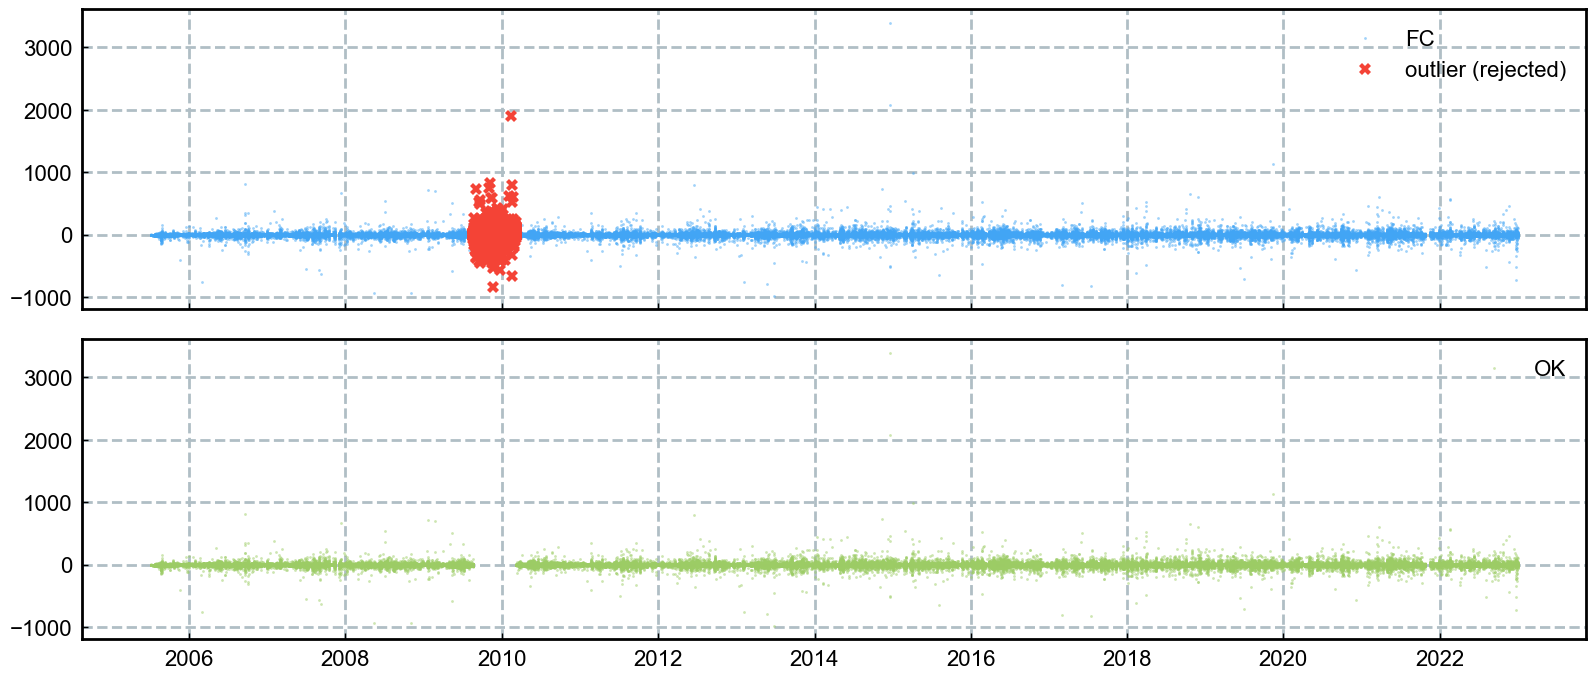

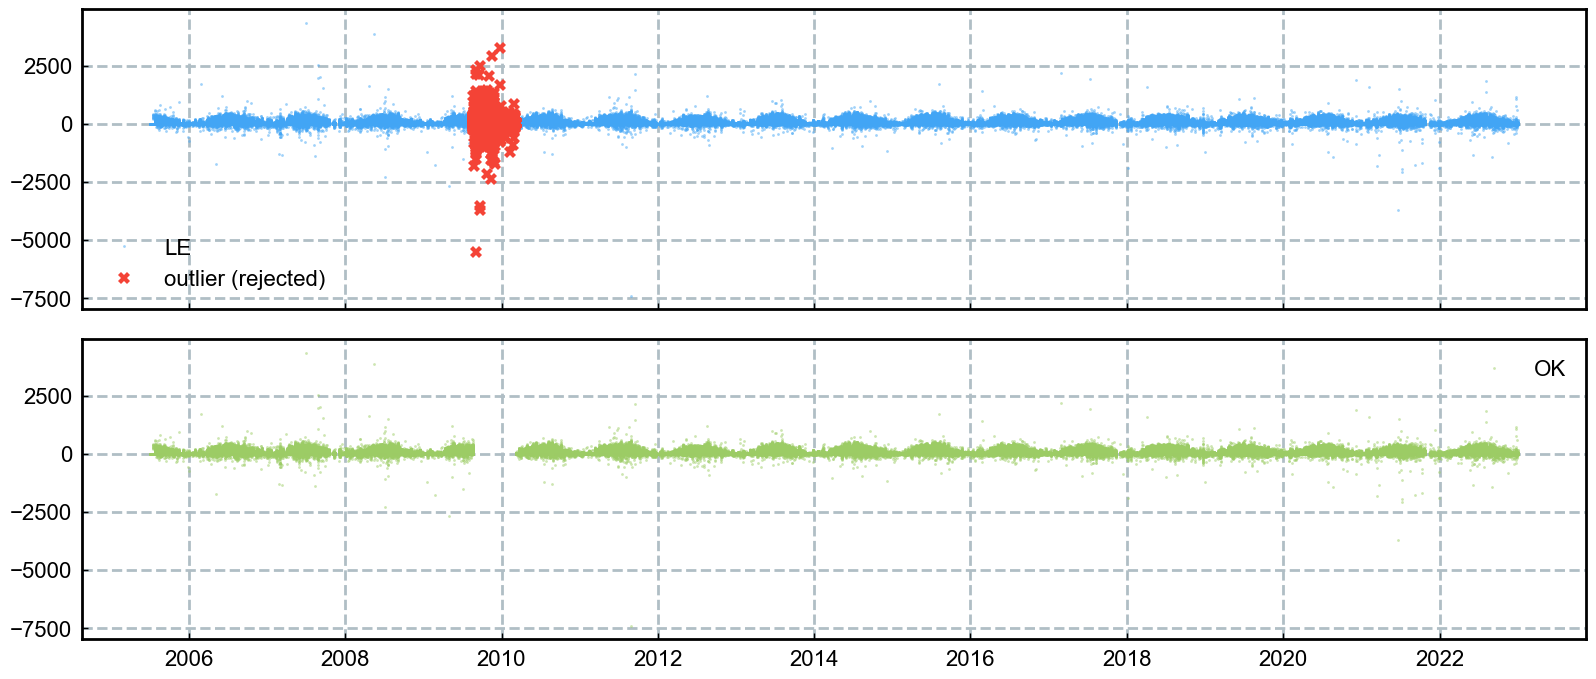

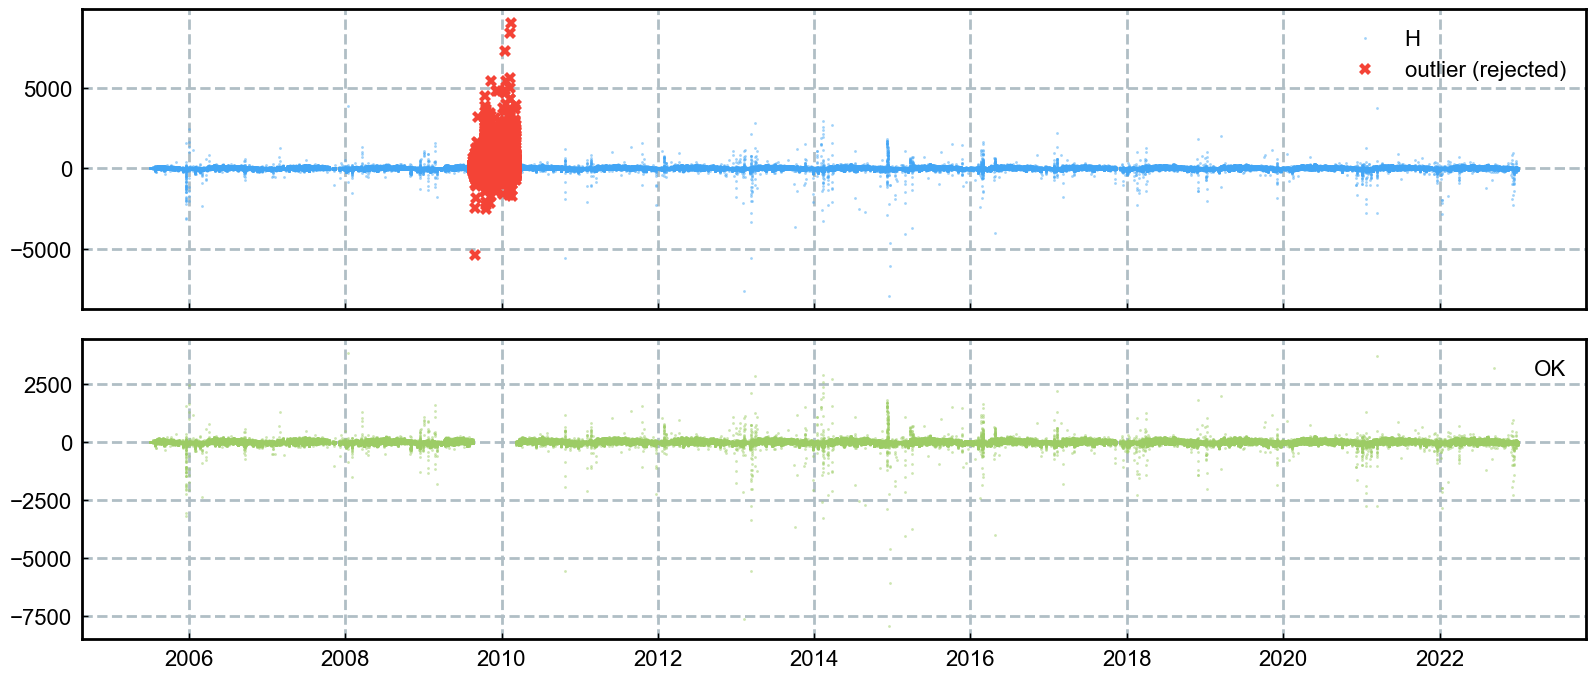

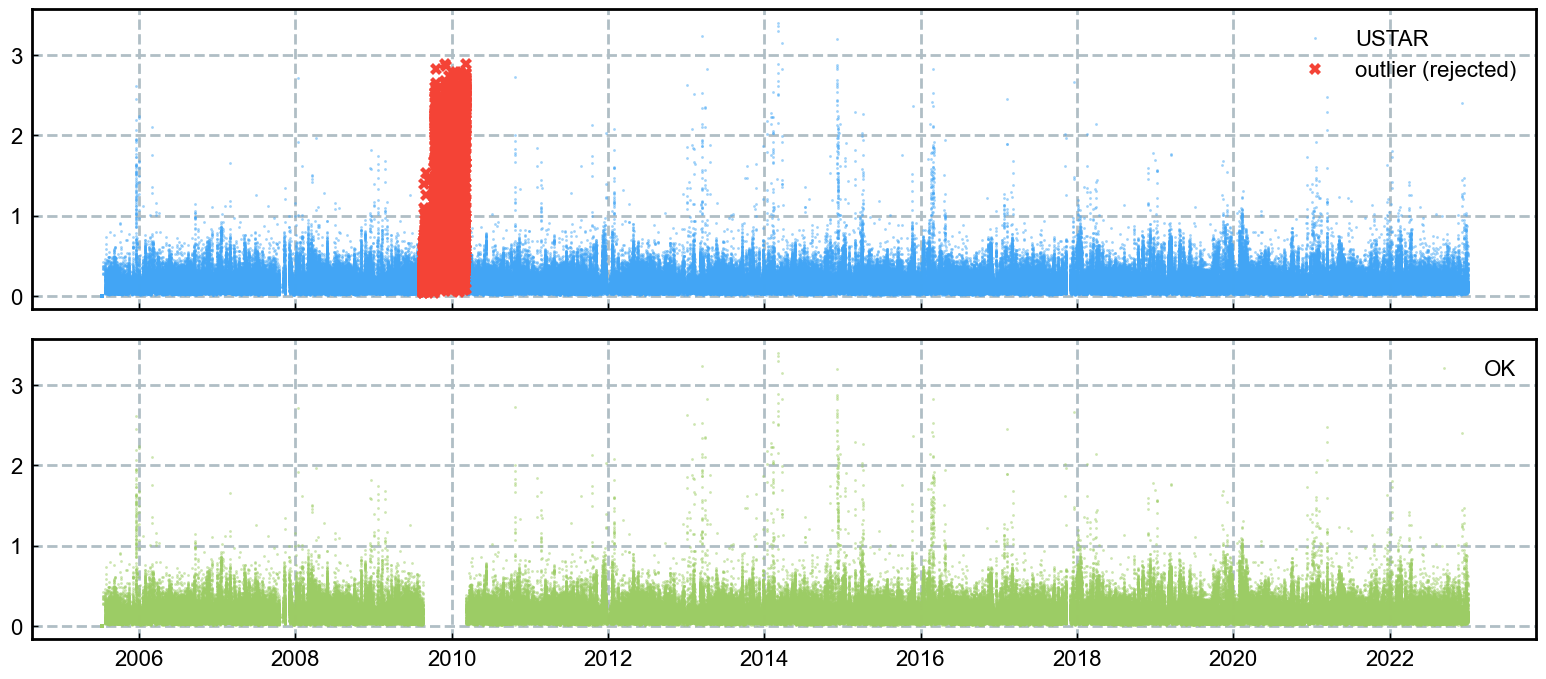

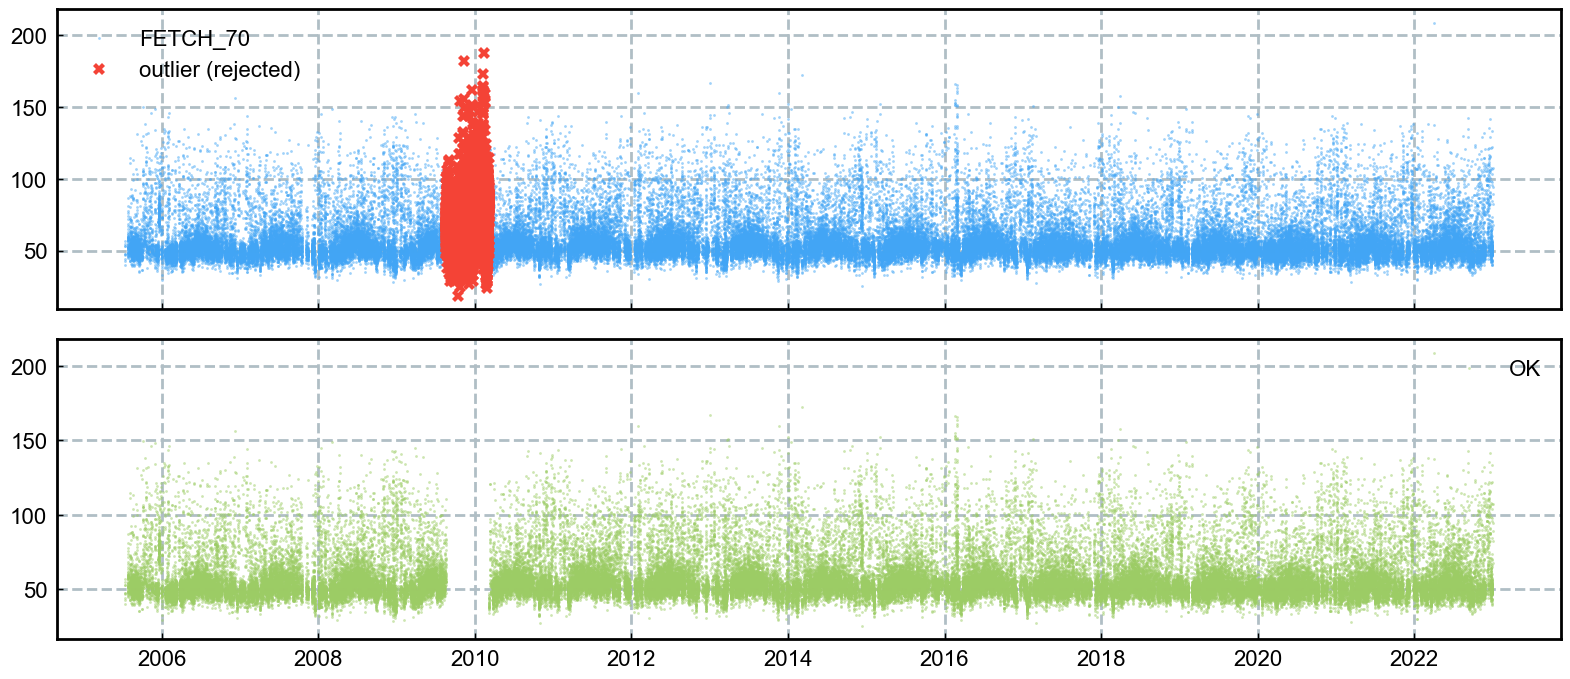

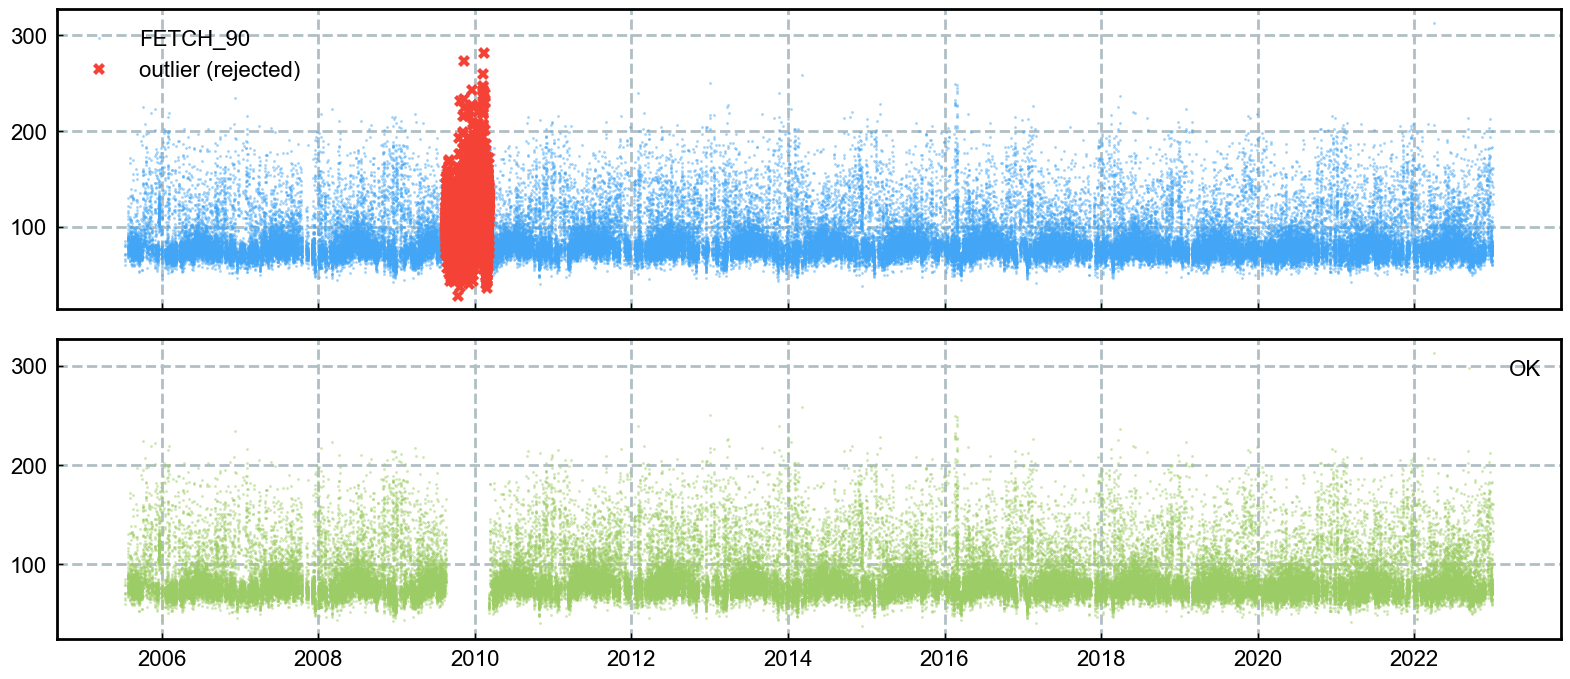

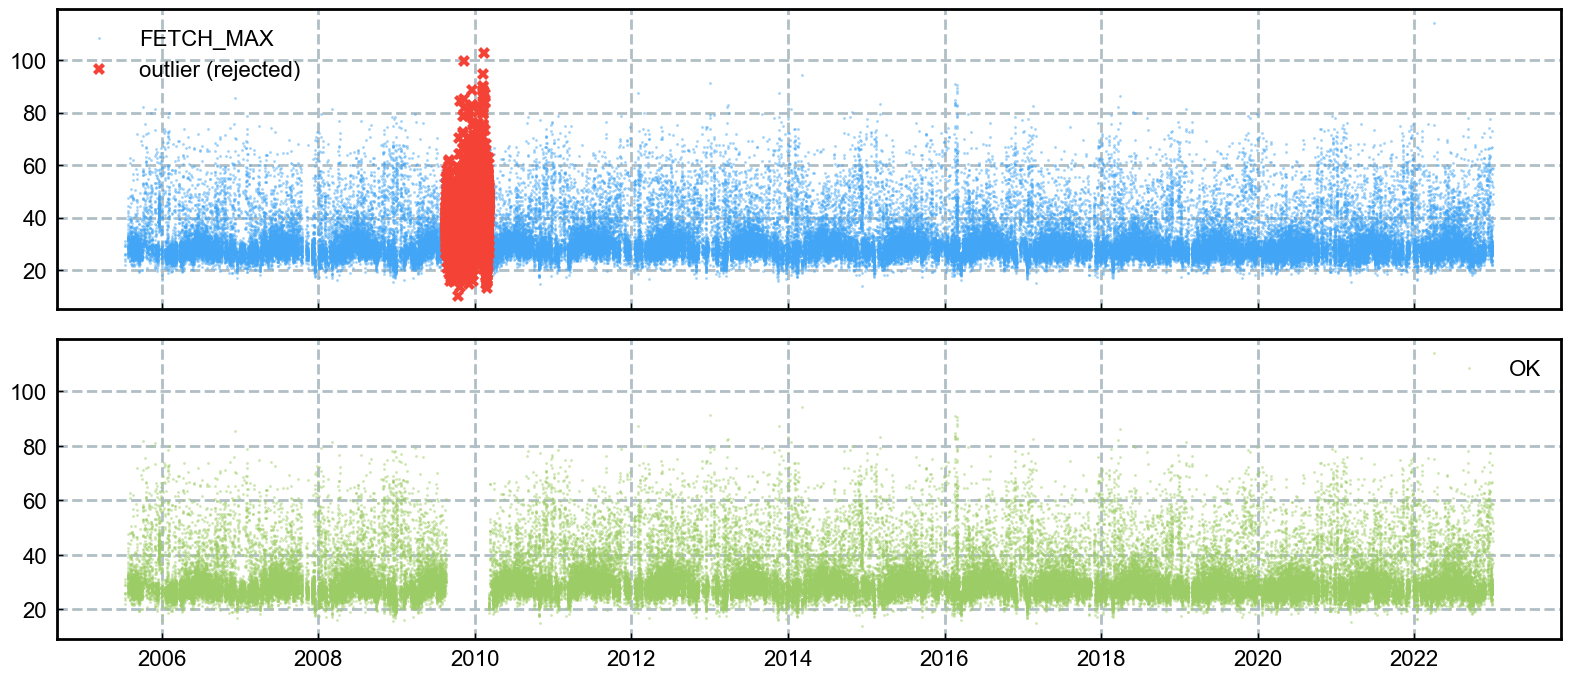

In [12]:
for v in VAR:
    fxn.remove_erroneous_data(var=v,
                              remove_dates=REMOVE_DATES,
                              showplot=True)

In [13]:
# These variables are erroneous during the defined time period
VAR = ['FC', 'LE']  
REMOVE_DATES = [    
    ['2017-06-09 00:30', '2017-06-12 11:00'],
    ['2017-06-12 18:00', '2017-06-16 11:00']
]


Removing FC data points for the following date(s) and/or time range(s):
    REMOVING data for FC time range between ['2017-06-09 00:30', '2017-06-12 11:00'] (dates are inclusive)
    REMOVING data for FC time range between ['2017-06-12 18:00', '2017-06-16 11:00'] (dates are inclusive)


[ManualRemoval]  ========================================
[ManualRemoval]  ManualRemoval
[ManualRemoval]  ========================================
Generating flag FLAG_FC_OUTLIER_MANUAL_TEST for variable FC ...
[ManualRemoval]  Done.
[ManualRemoval]  ________________________________________
 Done.

Removing LE data points for the following date(s) and/or time range(s):
    REMOVING data for LE time range between ['2017-06-09 00:30', '2017-06-12 11:00'] (dates are inclusive)
    REMOVING data for LE time range between ['2017-06-12 18:00', '2017-06-16 11:00'] (dates are inclusive)


[ManualRemoval]  ========================================
[ManualRemoval]  ManualRemoval
[ManualRemoval]  =================

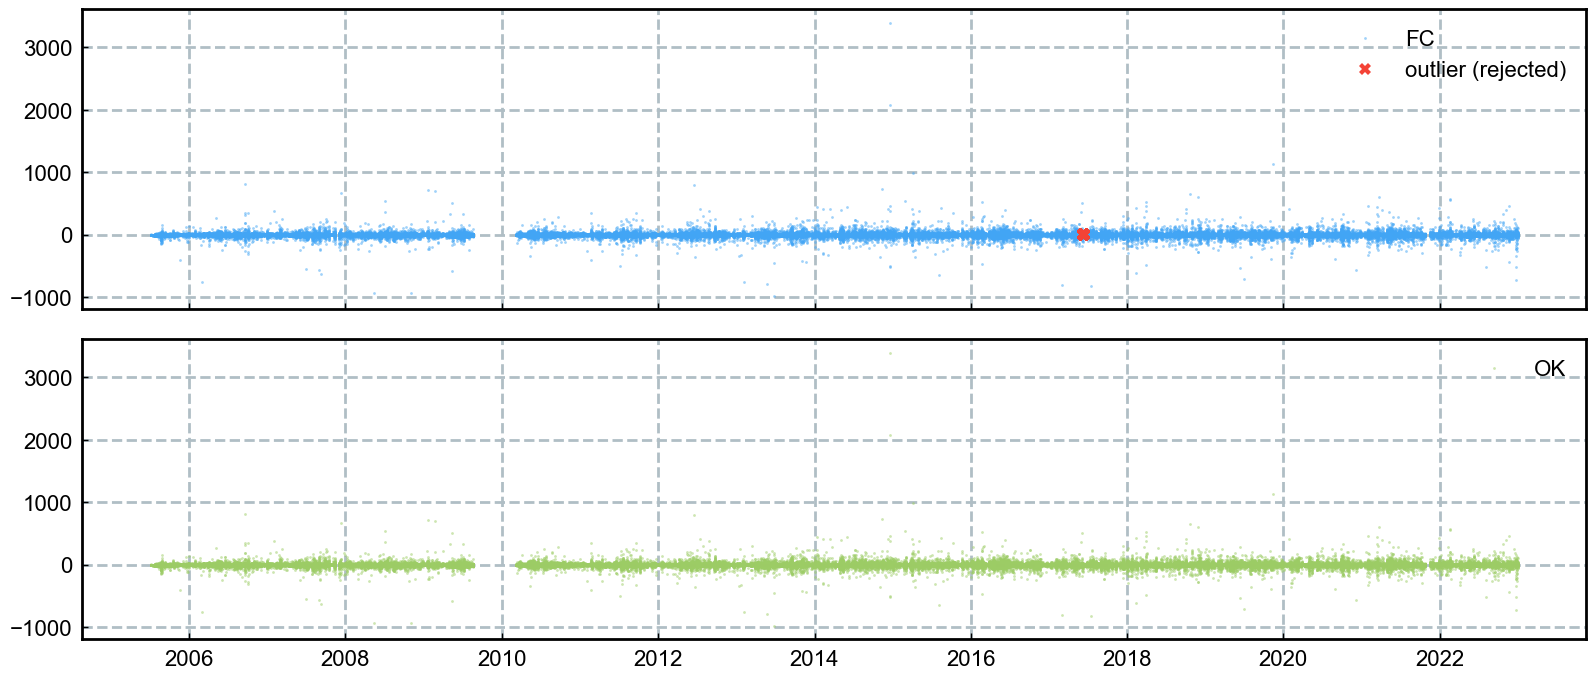

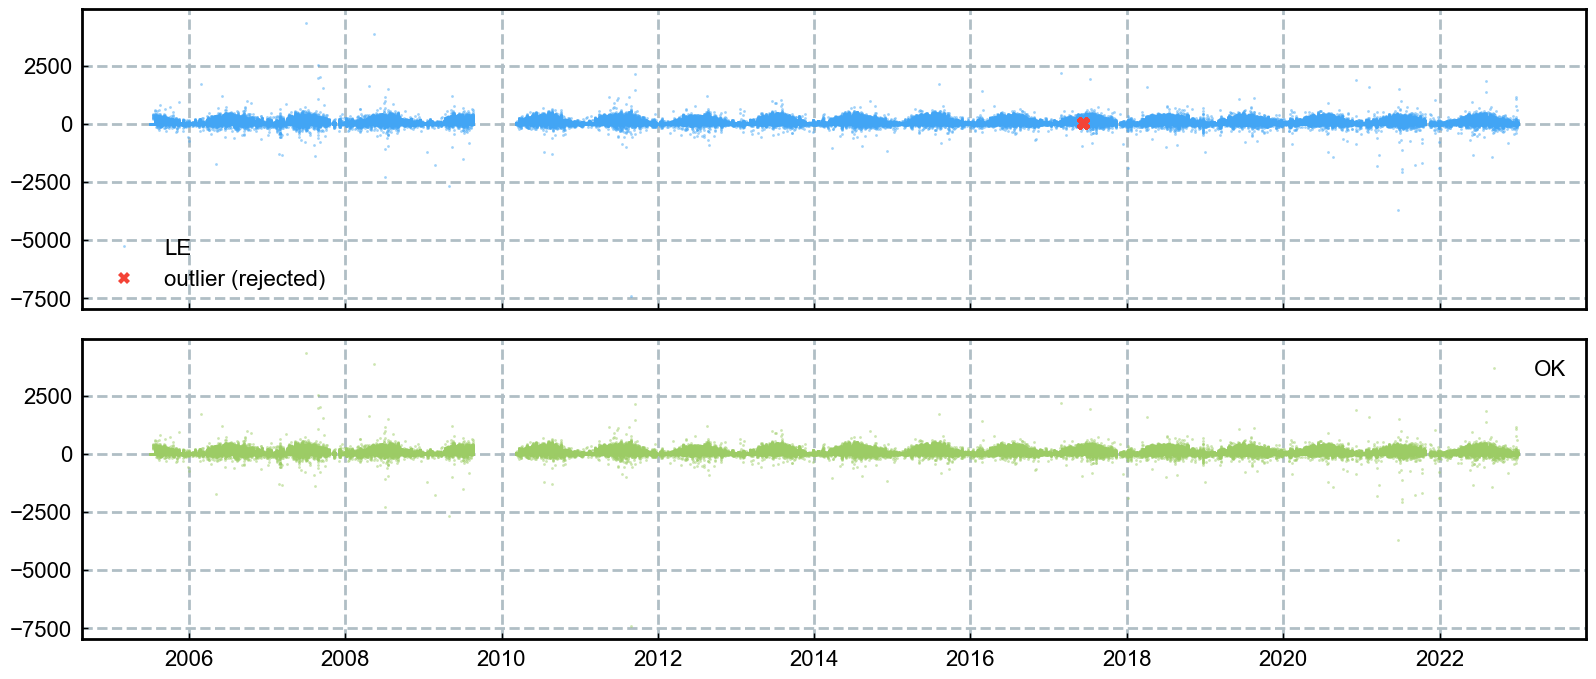

In [14]:
for v in VAR:
    fxn.remove_erroneous_data(var=v,
                              remove_dates=REMOVE_DATES,
                              showplot=True)

## Format data for FLUXNET

In [15]:
fxn.apply_fluxnet_format()


Assembling subset of variables ...
    Found: ['FC', 'FC_SSITC_TEST', 'SC_SINGLE', 'CO2', 'LE', 'LE_SSITC_TEST', 'SLE_SINGLE', 'H2O', 'H', 'H_SSITC_TEST', 'SH_SINGLE', 'USTAR', 'WD', 'WS', 'FETCH_70', 'FETCH_90', 'FETCH_MAX', 'SW_IN_1_1_1', 'TA_1_1_1', 'RH_1_1_1', 'PA_1_1_1', 'LW_IN_1_1_1', 'PPFD_IN_1_1_1']
    Not found: ['G_1_1_1', 'NETRAD_1_1_1', 'TS_1_1_1', 'P_1_1_1', 'SWC_1_1_1']

Setting all missing values to -9999 ...

The following variables are renamed to comply with FLUXNET variable codes:
    RENAMED --> SC_SINGLE was renamed to SC
    RENAMED --> SLE_SINGLE was renamed to SLE
    RENAMED --> SH_SINGLE was renamed to SH

The following variables have been renamed:
    RENAMED --> FC was renamed to FC_1_1_1
    RENAMED --> FC_SSITC_TEST was renamed to FC_SSITC_TEST_1_1_1
    RENAMED --> SC was renamed to SC_1_1_1
    RENAMED --> CO2 was renamed to CO2_1_1_1
    RENAMED --> LE was renamed to LE_1_1_1
    RENAMED --> LE_SSITC_TEST was renamed to LE_SSITC_TEST_1_1_1
    RENAMED 

## Save yearly `CSV` files

In [16]:
fxn.export_yearly_files()


Saving yearly CSV files ...
    --> Saved file L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload\CH-FRU_2005_fluxes_meteo_20231031.csv.
    --> Saved file L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload\CH-FRU_2006_fluxes_meteo_20231031.csv.
    --> Saved file L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload\CH-FRU_2007_fluxes_meteo_20231031.csv.
    --> Saved file L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload\CH-FRU_2008_fluxes_meteo_20231031.csv.
    --> Saved file L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload\CH-FRU_2009_fluxes_meteo_20231031.csv.
    --> Saved file L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload\CH-FRU_2010_fluxes_meteo_20231031.csv.
    --> Saved file L:\Sync\luhk_work\CURRENT\fru\Level-1_results_fluxnet\1-formatted_for_upload\CH-FRU_2011_fluxes_meteo_20231031.csv.
    --> Saved file L:\Sync

</br>

# **Check FLUXNET data**

- The merged file data from all files can be directly returned with `.get_data()`
- Note that the dataframe below does not show exactly how the data look like in the formatted data files, but how data were stored in `diive`, hence the timestamp index `TIMESTAMP_MIDDLE`
- The yearly files do not contain the timestamp index `TIMESTAMP_MIDDLE`

## Dataframe that was used to generate yearly files

In [17]:
data_fluxnet = fxn.get_data()
data_fluxnet

TIMESTAMP_START TIMESTAMP_END  FC_1_1_1  FC_SSITC_TEST_1_1_1     SC_1_1_1  CO2_1_1_1  LE_1_1_1  LE_SSITC_TEST_1_1_1    SLE_1_1_1  H2O_1_1_1    H_1_1_1  H_SSITC_TEST_1_1_1     SH_1_1_1  USTAR_1_1_1  WD_1_1_1  WS_1_1_1  FETCH_70_1_1_1  FETCH_90_1_1_1  FETCH_MAX_1_1_1  SW_IN_1_1_1    TA_1_1_1   RH_1_1_1  PA_1_1_1  LW_IN_1_1_1  PPFD_IN_1_1_1
TIMESTAMP_MIDDLE                                                                                                                                                                                                                                                                                                                                                       
2005-07-05 08:45:00    200507050830  200507050900 -1.452050                  1.0 -9999.000000    409.921  0.319460                  1.0 -9999.000000   12.54120   1.016460                 1.0 -9999.000000     0.004104  113.1020  0.015840         -9999.0         -9999.0          -9999.0      -9999.0 -9999.00000 -9999.0000   -9999.0    -9999.000        -9999.0
2005-07-05 09:15:00    200507050900  200507050930  0.207326                  2.0     0.761637    424.090  0.067138                  2.0    -0.632032   12.27330   0.183814                 1.0    -1.257310     0.006308  125.1690  0.018193         -9999.0         -9999.0          -9999.0      -9999.0 -9999.00000 -9999.0000   -9999.0    -9999.000        -9999.0
2005-07-05 09:45:00    200507050930  200507051000 -0.381113                  2.0    -1.901180    388.776 -0.108901                  2.0    -0.699526   11.97740   1.324690                 1.0    -0.668700     0.006090  131.1880  0.015611         -9999.0         -9999.0          -9999.0      -9999.0 -9999.00000 -9999.0000   -9999.0    -9999.000        -9999.0
2005-07-05 10:15:00    200507051000  200507051030  0.154419                  1.0    -0.311197    382.996 -0.064659                  1.0    -0.486481   11.77160   0.082388                 1.0    -0.000813     0.007233  133.9610  0.017642         -9999.0         -9999.0          -9999.0      -9999.0 -9999.00000 -9999.0000   -9999.0    -9999.000        -9999.0
2005-07-05 10:45:00    200507051030  200507051100 -0.240110                  2.0     2.388140    427.468 -0.040537                  2.0    -0.185020   11.69310  -0.096005                 1.0     1.230580     0.006679  108.8060  0.013876         -9999.0         -9999.0          -9999.0      -9999.0 -9999.00000 -9999.0000   -9999.0    -9999.000        -9999.0
...                             ...           ...       ...                  ...          ...        ...       ...                  ...          ...        ...        ...                 ...          ...          ...       ...       ...             ...             ...              ...          ...         ...        ...       ...          ...            ...
2022-12-31 22:45:00    202212312230  202212312300  1.210100                  0.0     0.069432    421.579  7.121200                  1.0     0.108045    8.64158 -25.960300                 0.0    -0.674189     0.131824   54.6935  0.660836         -9999.0         -9999.0          -9999.0          0.0    10.40080    62.5504   -9999.0      278.846            0.0
2022-12-31 23:15:00    202212312300  202212312330 -1.503480                  2.0     0.029350    422.113 -7.078180                  1.0    -0.071440    8.61249  11.805700                 2.0    -2.362870     0.178685   88.4788  0.535631         -9999.0         -9999.0          -9999.0          0.0     8.92672    68.8316   -9999.0      271.380            0.0
2022-12-31 23:45:00    202212312330  202301010000  4.104030                  0.0    -0.038788    421.408 -0.858139                  0.0     0.522764    8.82527 -52.880900                 0.0     0.081891     0.095143  108.9400  0.586568         -9999.0         -9999.0          -9999.0          0.0     8.97778    70.3356   -9999.0      277.935            0.0
2023-01-01 00:15:00    202301010000  202301010030  1.535880 

In [18]:
data_fluxnet.columns.to_list()

['TIMESTAMP_START',
 'TIMESTAMP_END',
 'FC_1_1_1',
 'FC_SSITC_TEST_1_1_1',
 'SC_1_1_1',
 'CO2_1_1_1',
 'LE_1_1_1',
 'LE_SSITC_TEST_1_1_1',
 'SLE_1_1_1',
 'H2O_1_1_1',
 'H_1_1_1',
 'H_SSITC_TEST_1_1_1',
 'SH_1_1_1',
 'USTAR_1_1_1',
 'WD_1_1_1',
 'WS_1_1_1',
 'FETCH_70_1_1_1',
 'FETCH_90_1_1_1',
 'FETCH_MAX_1_1_1',
 'SW_IN_1_1_1',
 'TA_1_1_1',
 'RH_1_1_1',
 'PA_1_1_1',
 'LW_IN_1_1_1',
 'PPFD_IN_1_1_1']

## Overview of variables and some stats

In [19]:
# print(*data_fluxnet.columns, sep = "\n")
data_fluxnet.describe().T

count         mean          std       min          25%          50%          75%          max
FC_1_1_1             306657.0 -1889.860153  3912.720922   -9999.0   -17.790000    -2.258320     1.584220   3392.62000
FC_SSITC_TEST_1_1_1  306657.0 -1033.999573  3045.578085   -9999.0     0.000000     0.000000     1.000000      2.00000
SC_1_1_1             306657.0 -1197.530775  3246.507122   -9999.0    -0.265022    -0.019262     0.070118     21.99740
CO2_1_1_1            306657.0  -662.288450  3172.447925   -9999.0   376.457000   397.460000   415.918000    896.59200
LE_1_1_1             306657.0 -2281.295847  4243.183806   -9999.0   -40.788800     2.424690    43.309400   4337.02000
LE_SSITC_TEST_1_1_1  306657.0 -1851.575898  3884.712015   -9999.0     0.000000     0.000000     1.000000      2.00000
SLE_1_1_1            306657.0  -648.240416  2854.669510 -126105.0    -0.730784    -0.051110     0.477898  79930.50000
H2O_1_1_1            306657.0 -1837.653703  3884.288327   -9999.0     4.618930     8.568030    13.685700     48.43340
H_1_1_1              306657.0  -710.750865  2583.011791   -9999.0   -13.447800    -1.143550    11.981800   3863.57000
H_SSITC_TEST_1_1_1   306657.0  -472.966917  2124.054368   -9999.0     0.000000     0.000000     1.000000      2.00000
SH_1_1_1             306657.0  -494.216824  2167.356318   -9999.0    -0.549349    -0.046552     0.415597     28.09020
USTAR_1_1_1          306657.0  -717.045227  2580.168251   -9999.0     0.069409     0.131078     0.228086      3.39963
WD_1_1_1             306657.0  -330.350246  2157.808864   -9999.0    54.955000   145.162000   216.494000    359.99700
WS_1_1_1             306657.0  -472.011672  2124.267574   -9999.0     0.808999     1.248120     1.978160     13.36890
FETCH_70_1_1_1       306657.0 -6891.159659  4646.795652   -9999.0 -9999.000000 -9999.000000    47.396900    208.72700
FETCH_90_1_1_1       306657.0 -6882.442647  4659.837960   -9999.0 -9999.000000 -9999.000000    71.009200    312.71200
FETCH_MAX_1_1_1      306657.0 -6899.086953  4634.937932   -9999.0 -9999.000000 -9999.000000    25.923800    114.16400
SW_IN_1_1_1          306657.0  -492.313266  2471.877941   -9999.0    -3.795000     1.670200   180.557000   1112.30000
TA_1_1_1             306657.0  -568.484923  2332.220382   -9999.0     1.341910     7.706600    13.389000     35.51800
RH_1_1_1             306657.0  -877.101217  2959.288553   -9999.0    62.519000    85.586000    99.879000    100.20000
PA_1_1_1             306657.0 -9999.000000     0.000000   -9999.0 -9999.000000 -9999.000000 -9999.000000  -9999.00000
LW_IN_1_1_1          306657.0  -388.631665  2584.459242   -9999.0   264.170000   306.921000   337.730000    440.84400
PPFD_IN_1_1_1        306657.0  -308.017814  2467.820466   -9999.0    -0.128850     1.289000   364.171000   2313.62000

## Plot some key variables
- Keep in mind that FLUXNET requires missing values as `-9999` when looking at the plots

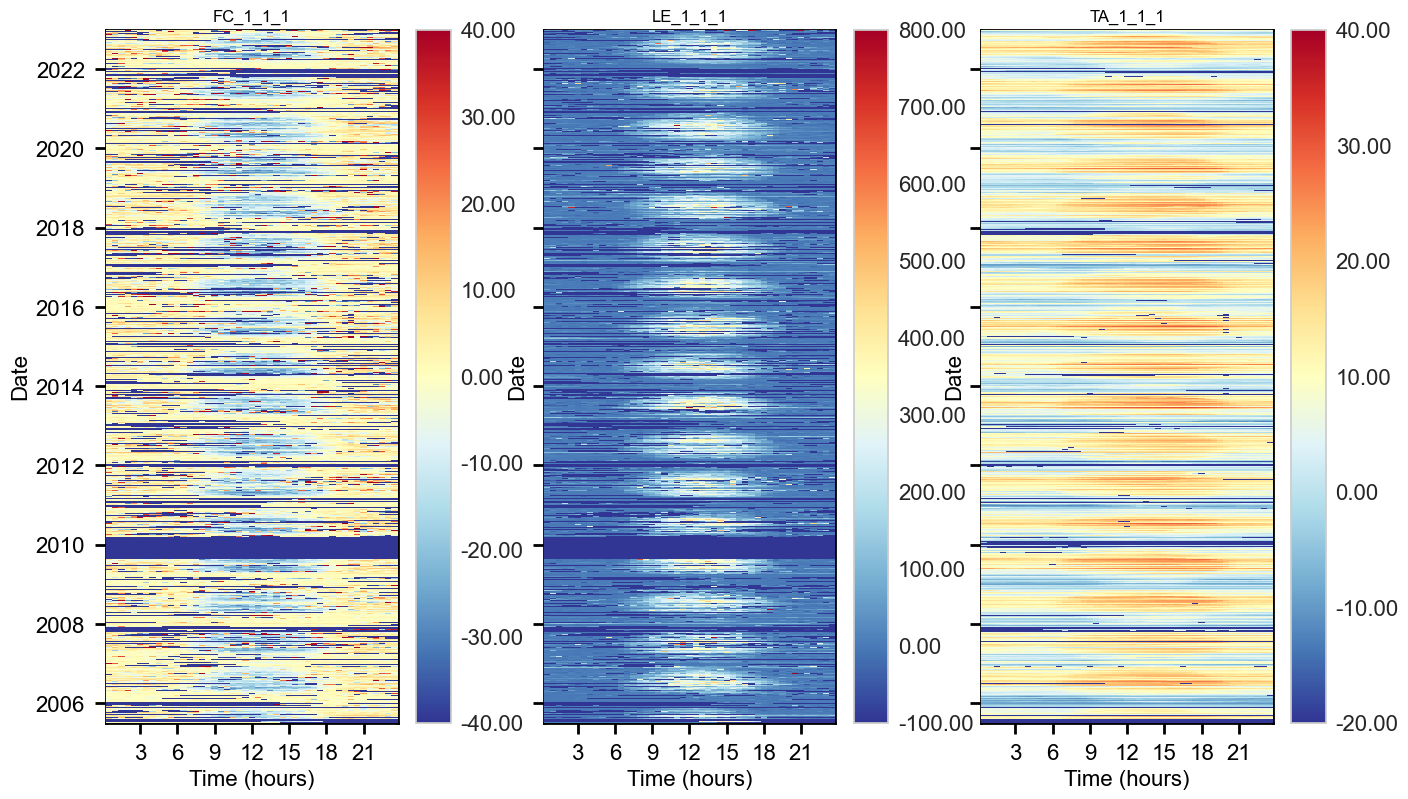

In [20]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
ax_fc = fig.add_subplot(gs[0, 0])
ax_le = fig.add_subplot(gs[0, 1])
ax_ta = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax_fc, series=data_fluxnet['FC_1_1_1'], vmin=-40, vmax=40).plot()
HeatmapDateTime(ax=ax_le, series=data_fluxnet['LE_1_1_1'], vmin=-100, vmax=800).plot()
HeatmapDateTime(ax=ax_ta, series=data_fluxnet['TA_1_1_1'], vmin=-20, vmax=40).plot()
ax_fc.set_title("FC_1_1_1", color='black')
ax_le.set_title("LE_1_1_1", color='black')
ax_ta.set_title("TA_1_1_1", color='black')
ax_le.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_ta.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

## Plot all variables

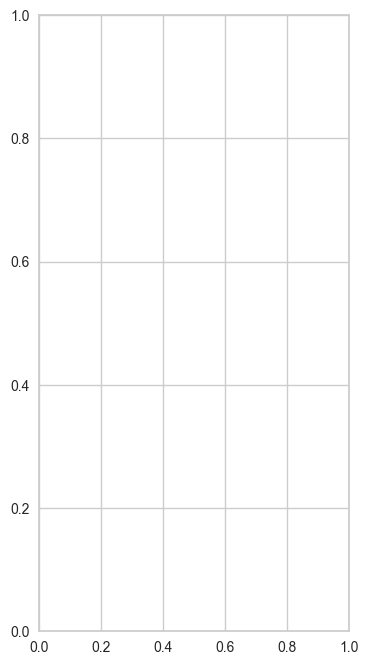

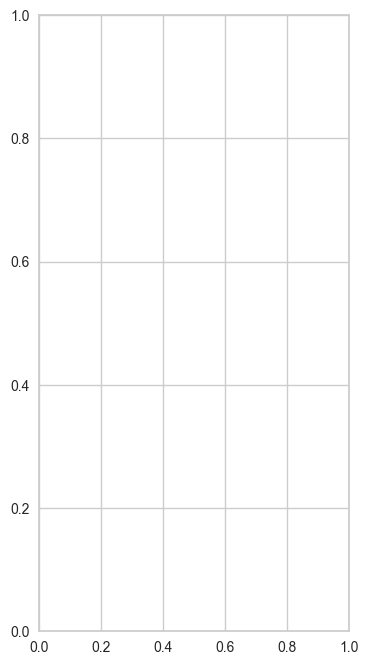

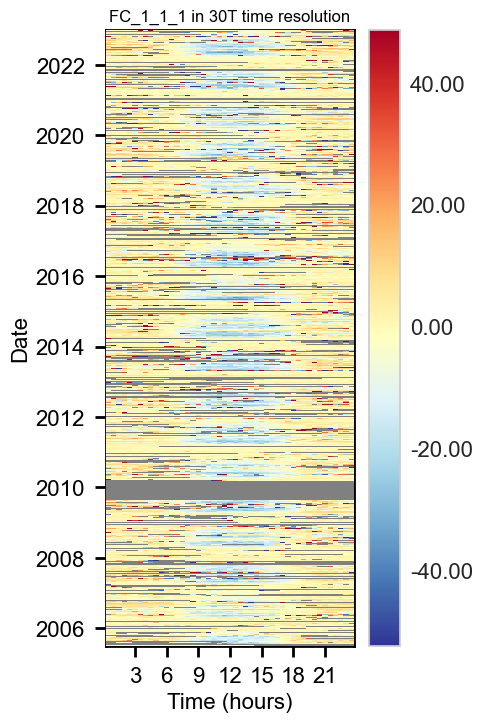

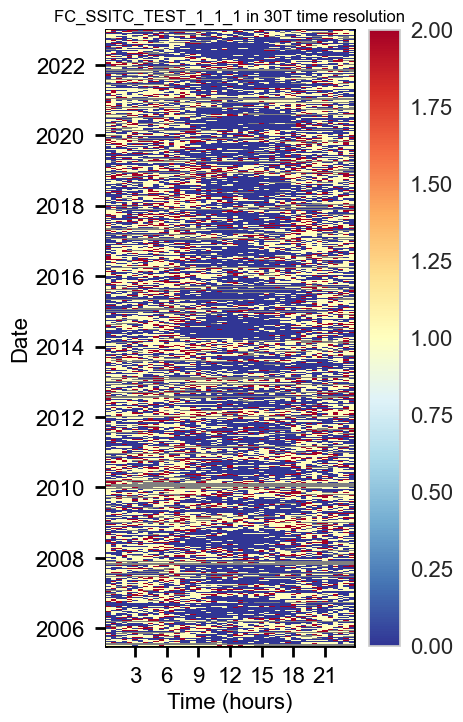

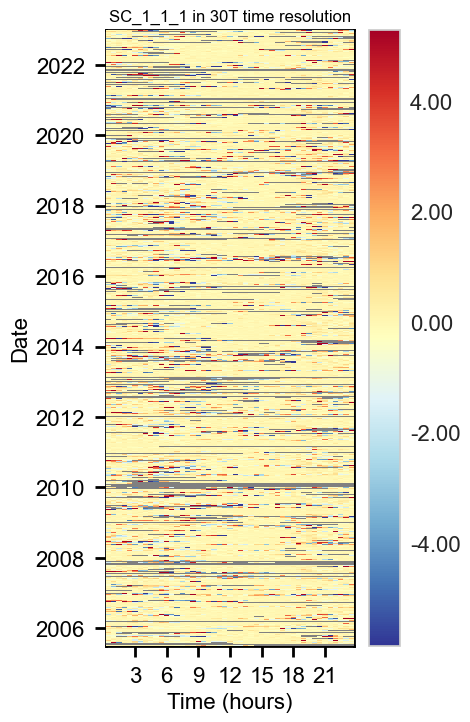

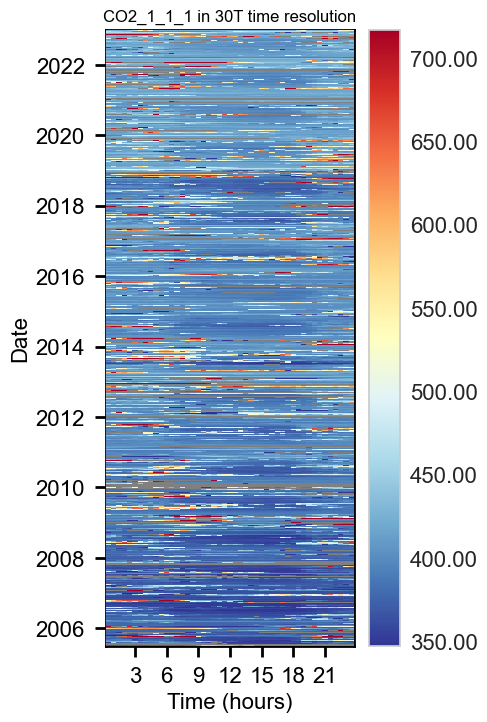

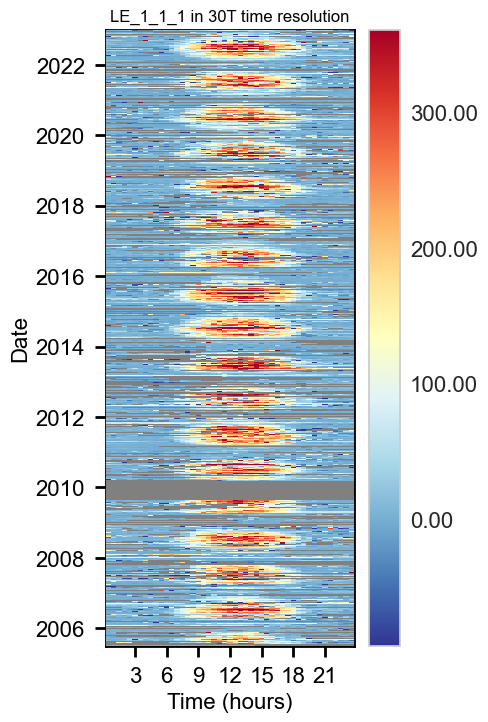

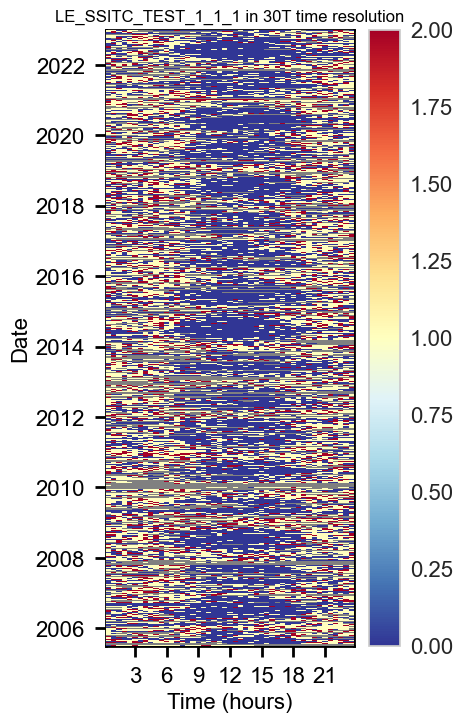

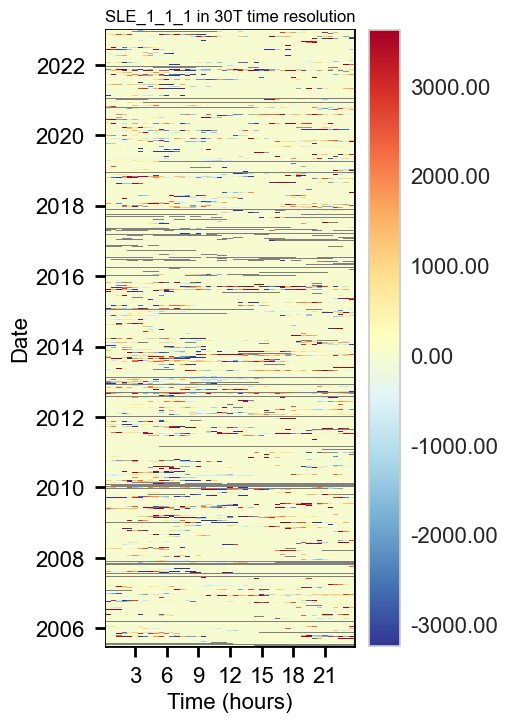

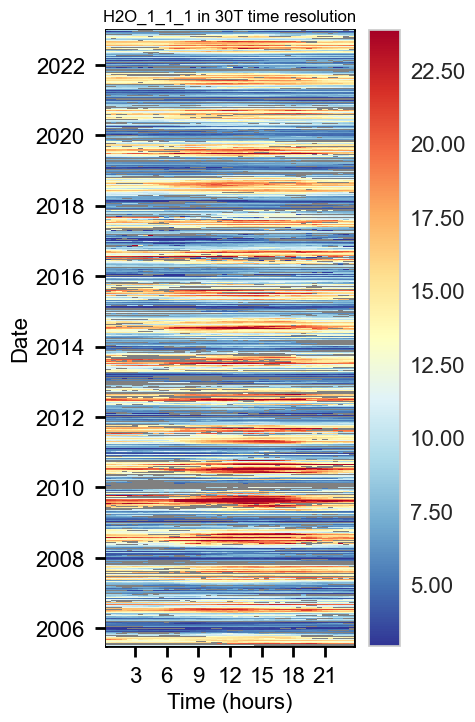

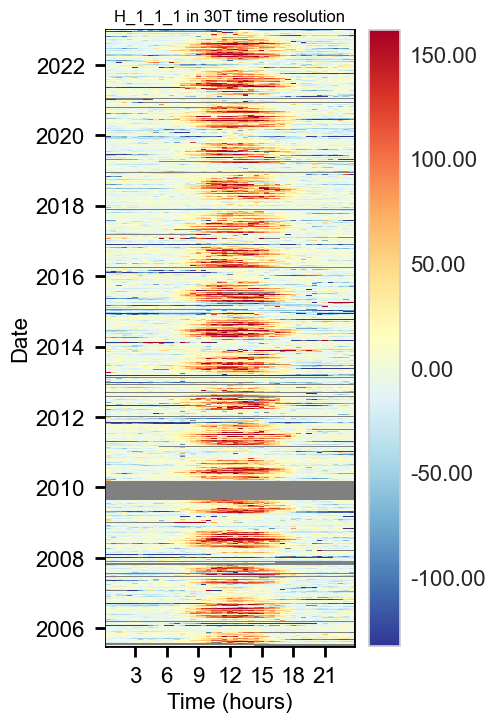

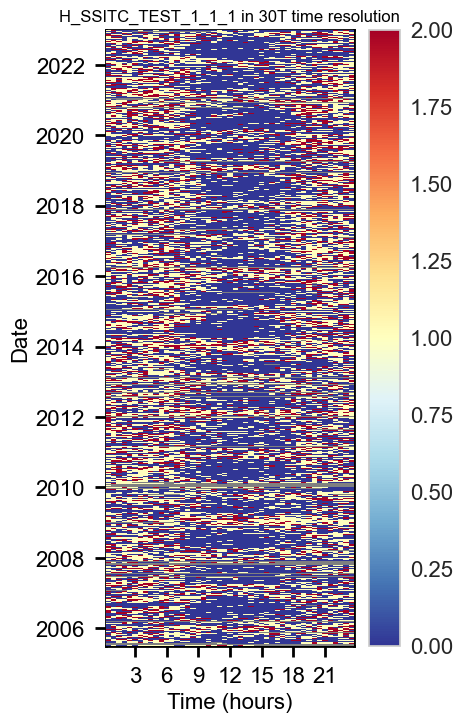

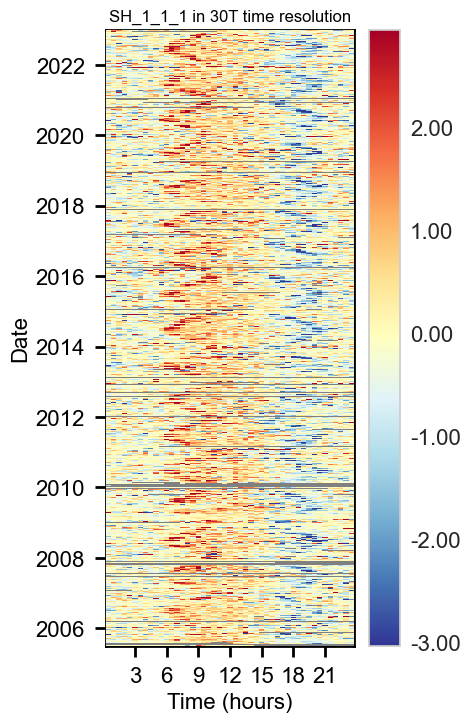

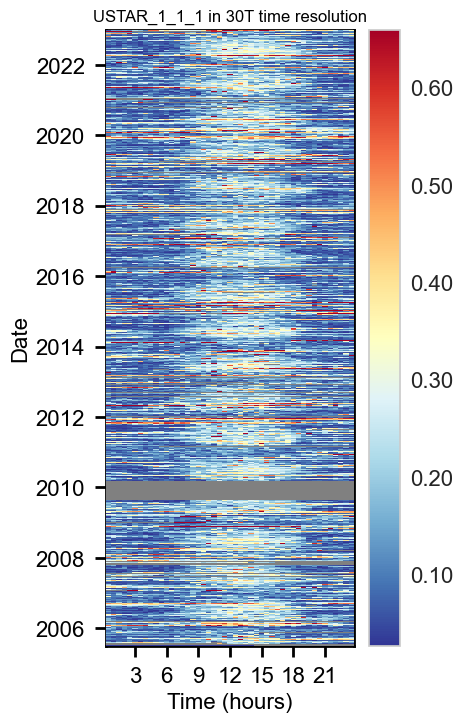

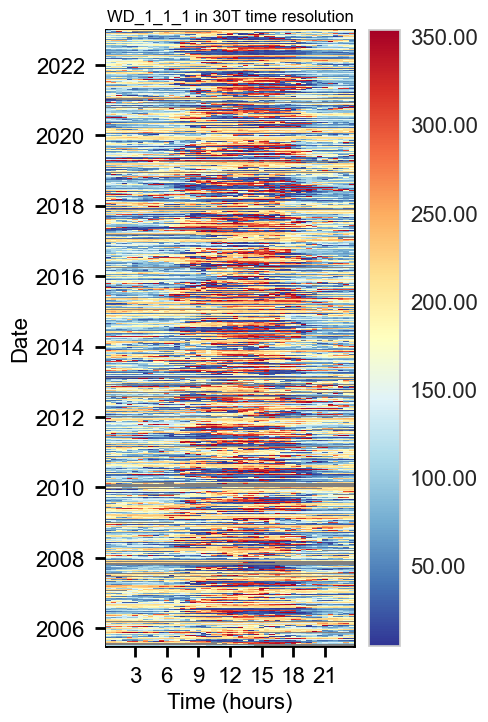

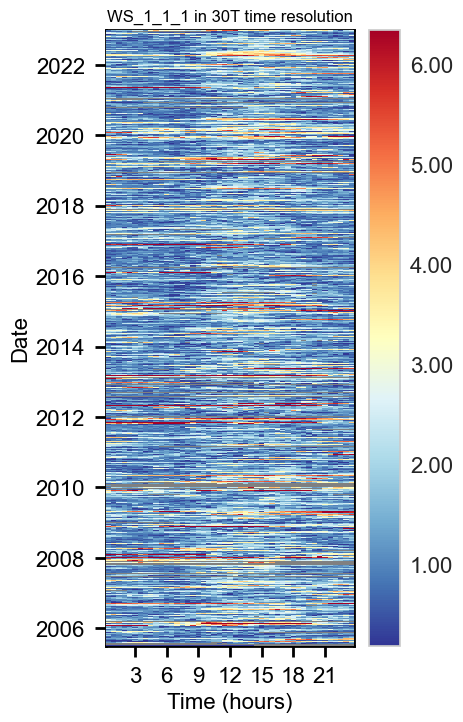

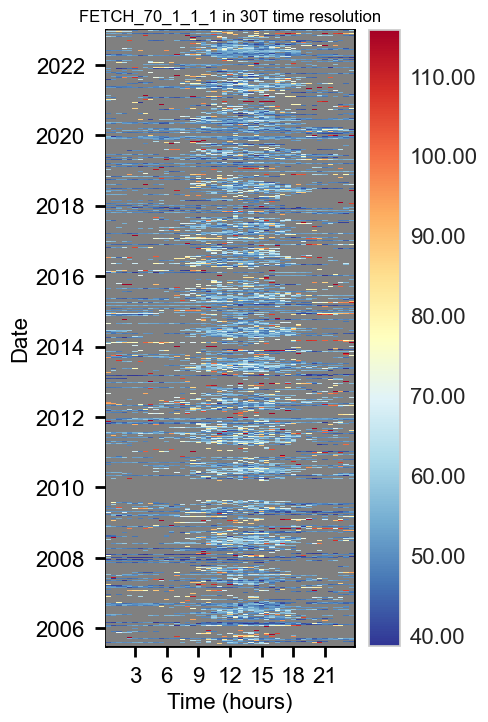

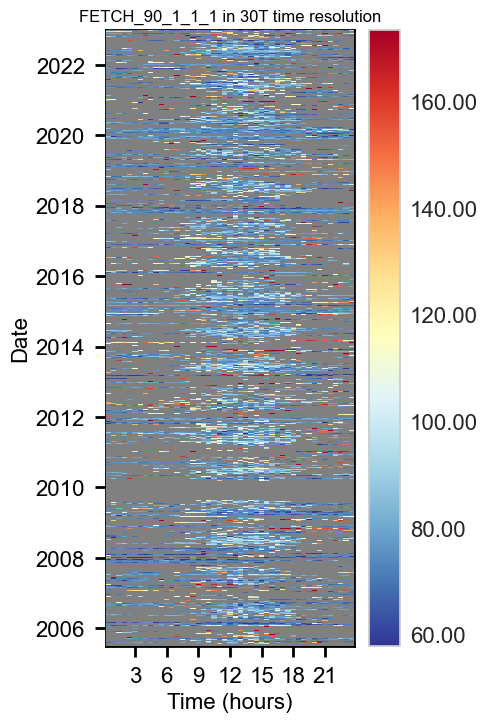

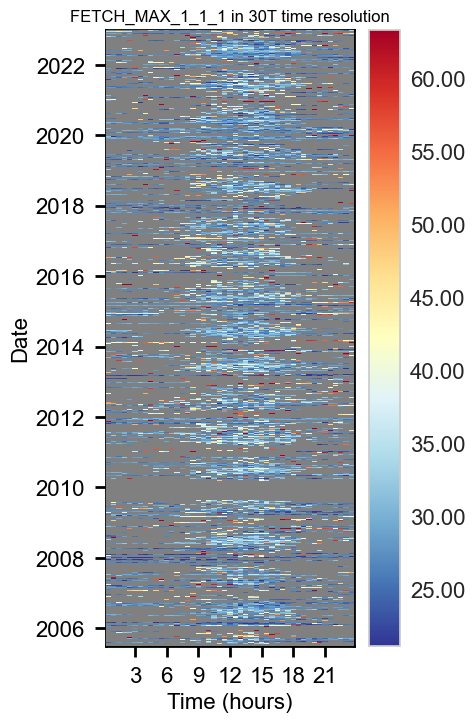

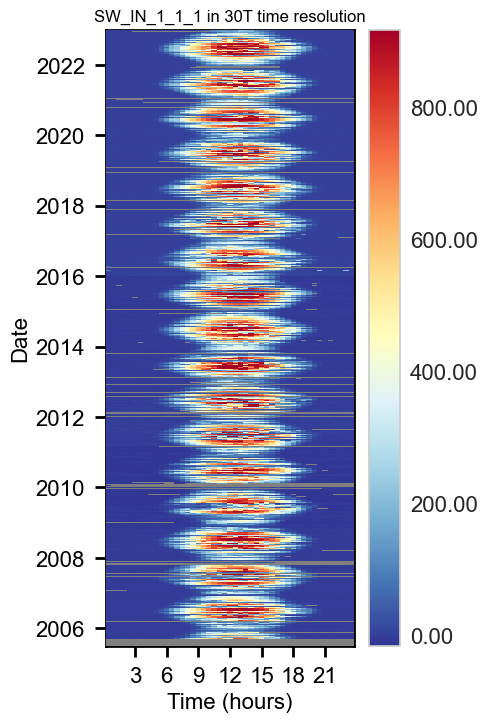

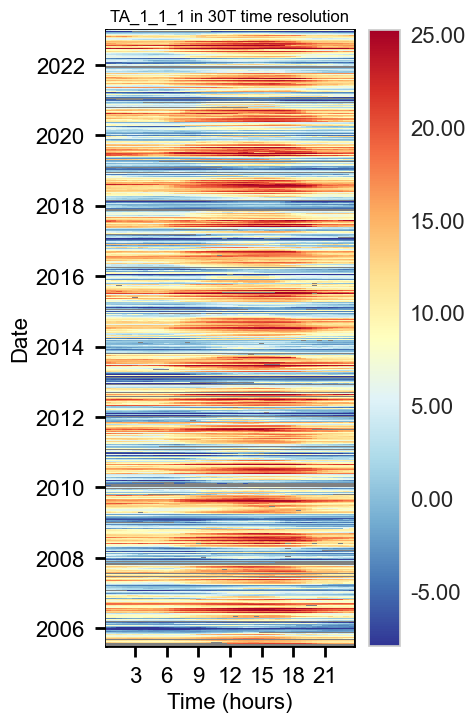

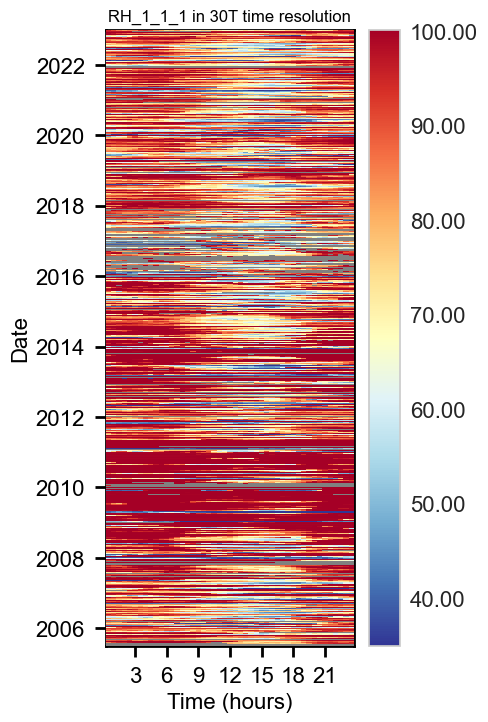

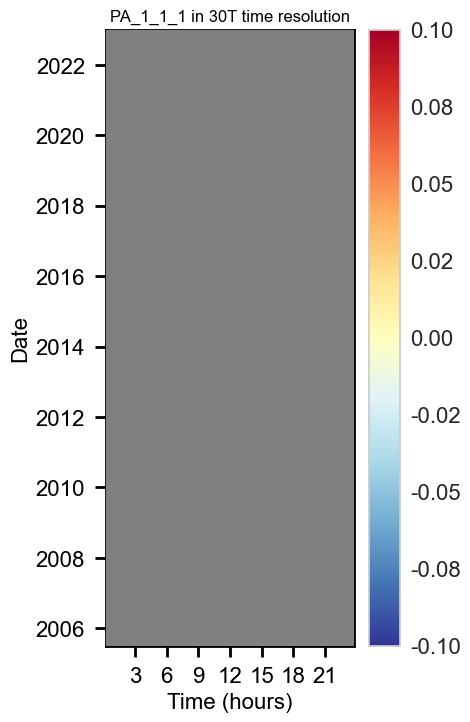

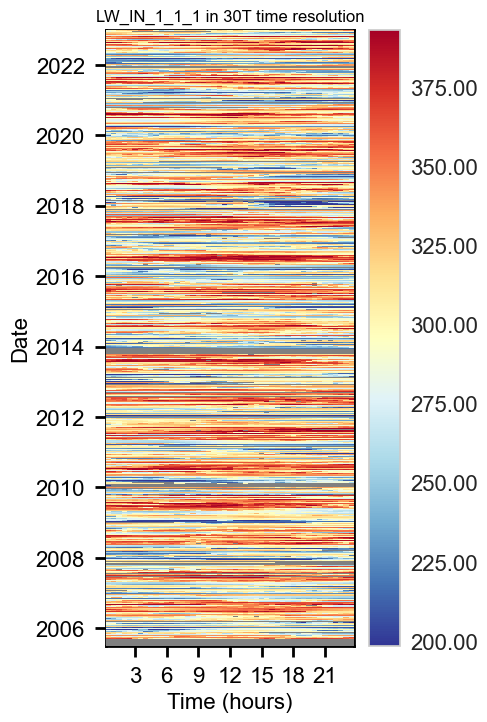

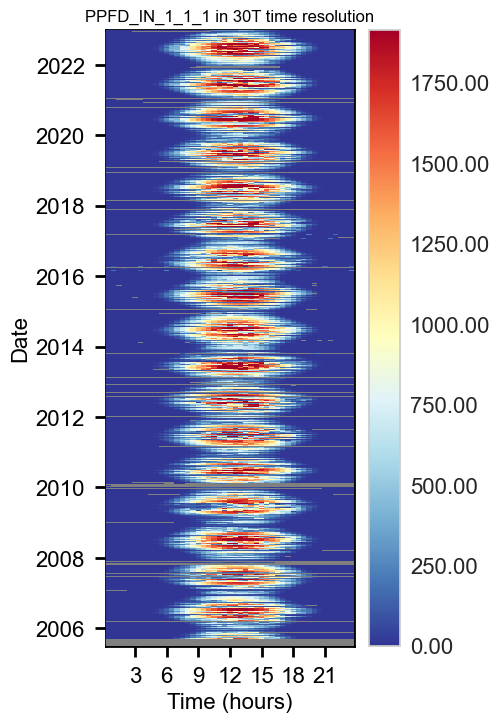

In [21]:
for col in data_fluxnet.columns:
    series = data_fluxnet[col].copy()
    series.replace(to_replace=-9999, value=np.nan, inplace=True)
    try:
        fig = plt.figure(facecolor='white', figsize=(4, 8))
        gs = gridspec.GridSpec(1, 1)  # rows, cols
        ax = fig.add_subplot(gs[0, 0])
        vmin = series.quantile(.01)
        vmax = series.quantile(.99)
        HeatmapDateTime(ax=ax, series=series, vmin=vmin, vmax=vmax).plot()
        ax_fc.set_title(col, color='black')
        fig.show()
    except TypeError:
        pass

</br>

# **End of notebook**

In [22]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2023-10-31 11:28:15
